#Importando o dataset

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Human_Resources.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'DailyRate', 'HourlyRate', 'MonthlyRate'], inplace=True)

#Análise exploratória

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [5]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [6]:
df['Attrition'].value_counts(normalize=True)

,proportion
Attrition,
No,0.838776
Yes,0.161224


Dados desbalanceados

In [7]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
var_quan = ['Age', 'DailyRate', 'DistaceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
            'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager'
            ]
var_qual = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'JobLevel', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
var_target = ['Attrition']

In [9]:
var_quant_continua = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                      'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
                      ]
var_quant_discreta = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance']
var_qual_ordinais = ['BusinessTravel' ,'Education', 'JobLevel', 'StockOptionLevel']
var_qual_nominais = ['Department', 'EducationField', 'JobRole', 'Gender', 'MaritalStatus', 'OverTime']

In [10]:
for i in df.columns:
  if i in var_quant_discreta:
    df[i] = df[i].astype(int)
  elif i in var_quant_continua:
    df[i] = df[i].astype(float)
  elif i in var_target:
    df[i] = df[i].astype(str)
  else:
    df[i] = df[i].astype(str)

In [11]:
len(var_quant_continua)

9

##Variáveis quantitativas contínuas

###Histogramas

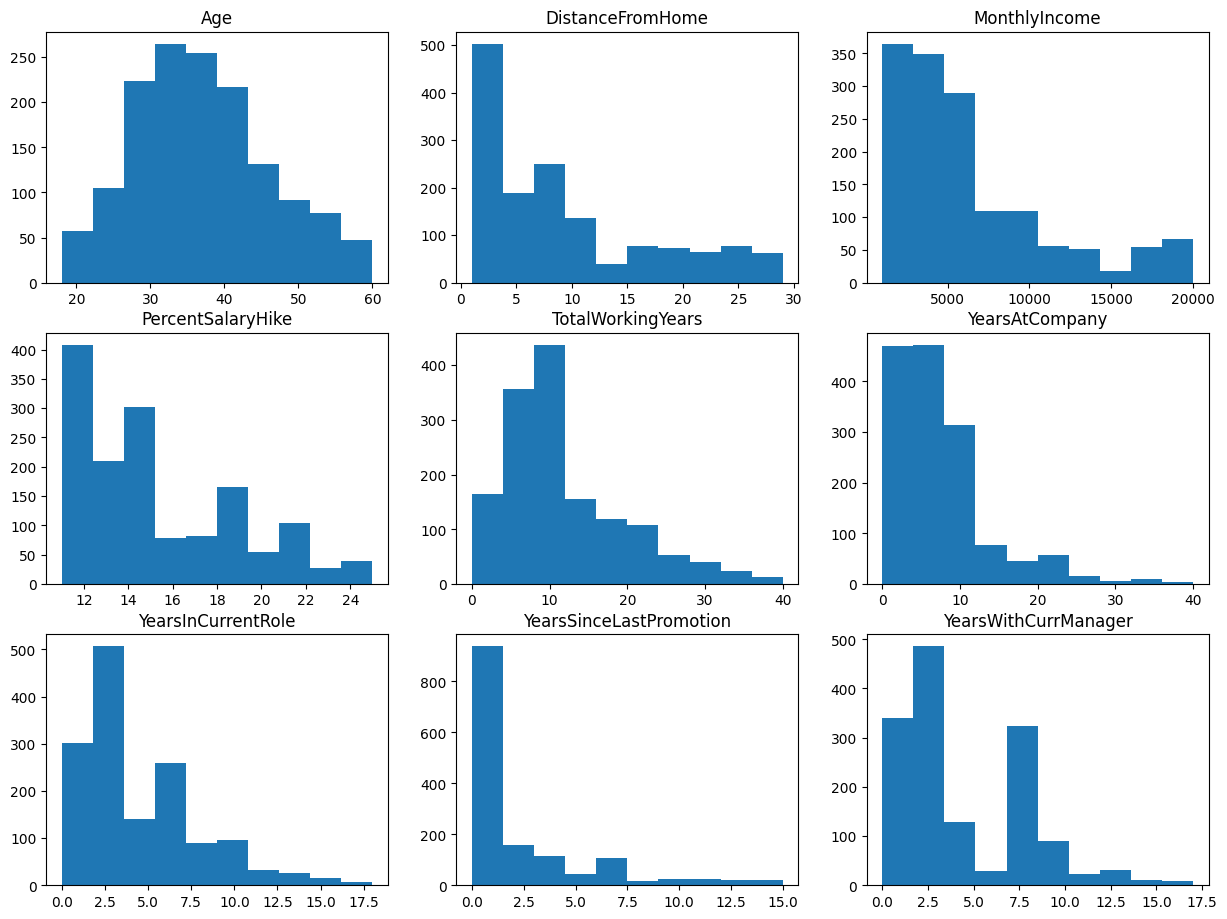

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.tight_layout()

for i in var_quant_continua:
  plt.subplot(4,3,var_quant_continua.index(i)+1)
  plt.hist(df[i])
  plt.title(i)

###Boxplots

In [13]:
import seaborn as sns

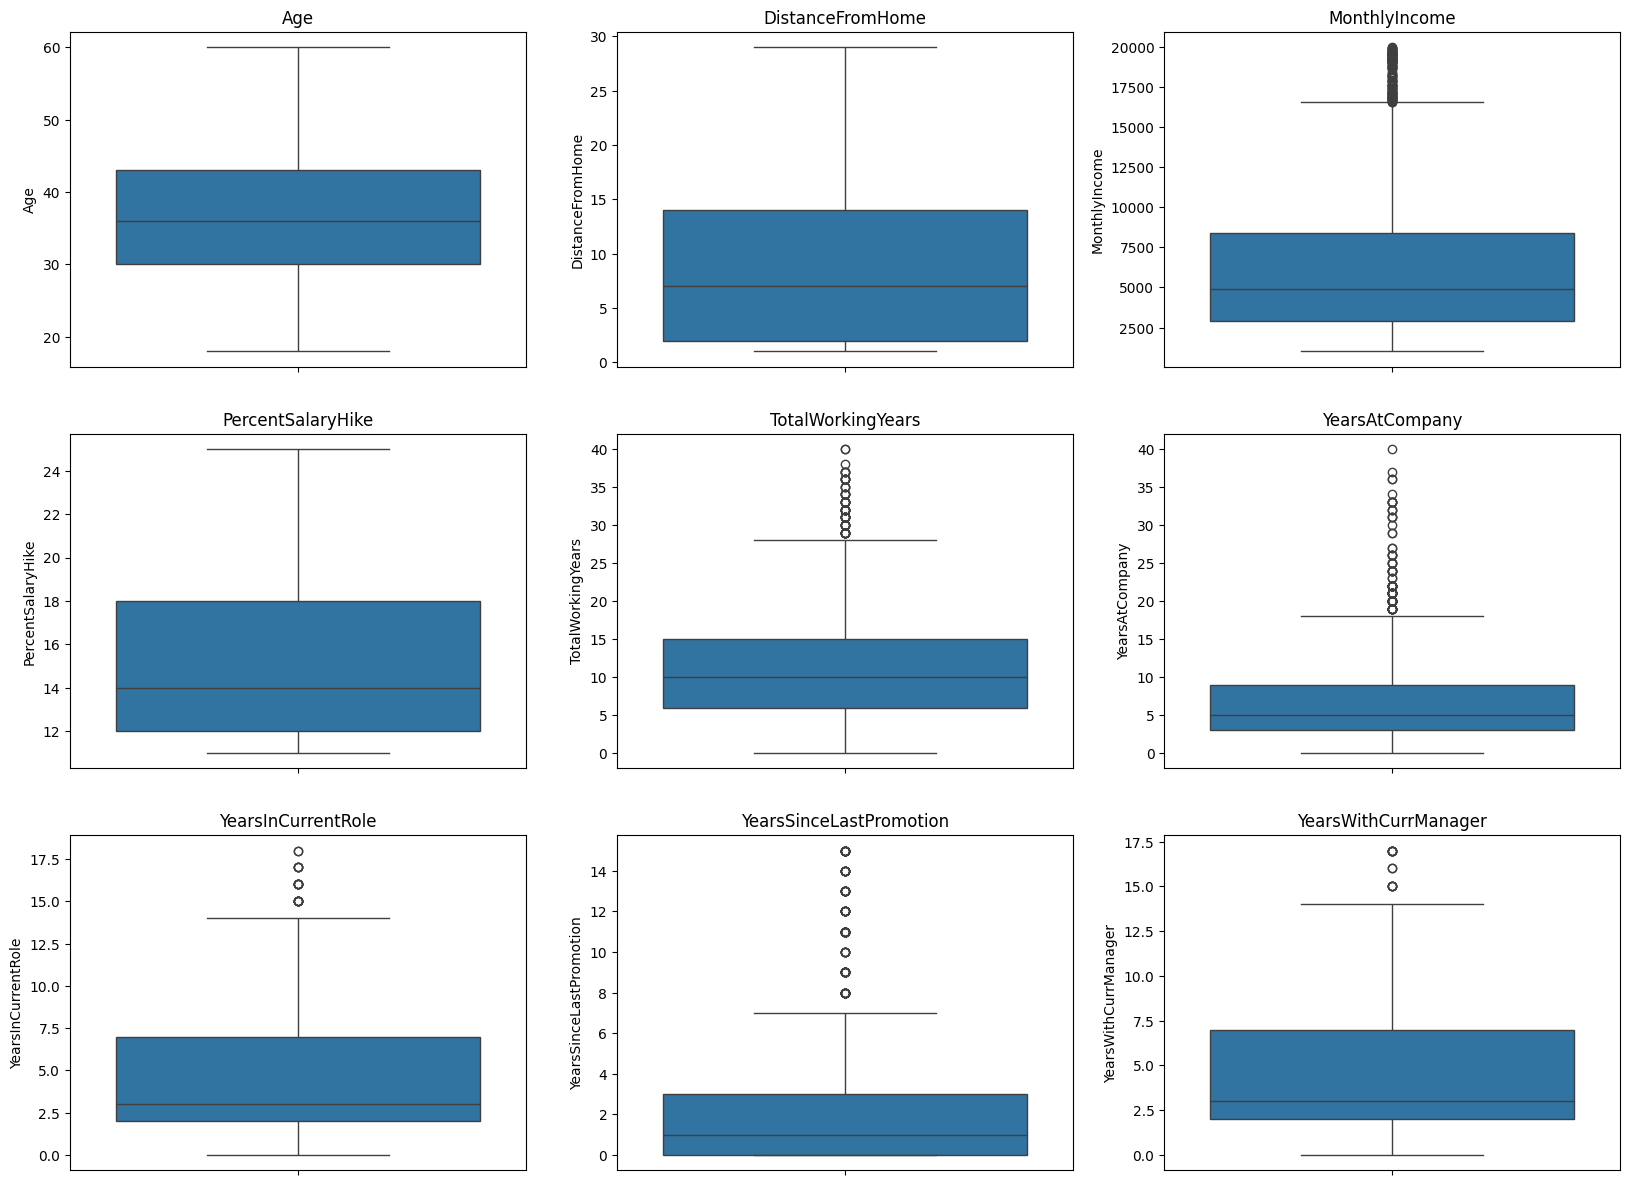

In [14]:
plt.figure(figsize=(20,20))
plt.tight_layout()

for i in var_quant_continua:
  plt.subplot(4,3,var_quant_continua.index(i)+1)
  sns.boxplot(df[i])
  plt.title(i)

###Correlações

<Axes: >

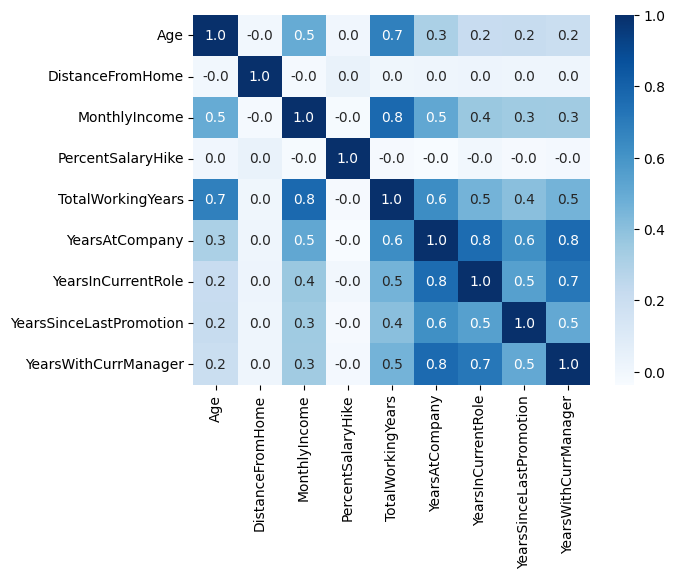

In [15]:
corre = df[var_quant_continua].corr()
sns.heatmap(corre, annot=True, cmap='Blues', fmt='.1f')

###Associações

In [16]:
selected_features = {}

In [17]:
var_quant_continua = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                      'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
                      ]

In [18]:
import numpy as np

In [19]:
def ana_assoc_att_continua(var_quant, data):
  '''
  Essa função será usada para analisar a associação entre a variável em questão e a variável Attrition.
  É usada com variáveis quantitativas e variável target.
  '''
  #Boxplots:
  sns.boxplot(x='Attrition', y=var_quant, data=df)
  plt.show()
  print('\n')

  #Criando os quartis:
  minimo = min(data[var_quant])
  Q1 = np.percentile(data[var_quant], 25)
  Q2 = np.percentile(data[var_quant], 50)
  Q3 = np.percentile(data[var_quant], 75)
  maximo = max(data[var_quant])

  #Criando as faixas:
  data.loc[(data[var_quant] >= minimo) & (data[var_quant] <= Q1), f'fx_{var_quant}'] = f'{minimo} a {Q1}'
  data.loc[(data[var_quant] > Q1) & (data[var_quant] <= Q2), f'fx_{var_quant}'] = f'{Q1} a {Q2}'
  data.loc[(data[var_quant] > Q2) & (data[var_quant] <= Q3), f'fx_{var_quant}'] = f'{Q2} a {Q3}'
  data.loc[(data[var_quant] > Q3) & (data[var_quant] <= maximo), f'fx_{var_quant}'] = f'{Q3} a {maximo}'

  #Tabela de frequências:
  cross_tab_qual_quant_prop = pd.crosstab(index=data[f'fx_{var_quant}'], columns=data['Attrition'], margins=True, normalize=True)
  cross_tab_qual_quant = pd.crosstab(index=data[f'fx_{var_quant}'], columns=data['Attrition'], margins=True)

  #Teste Qui-Quadrado:
  from scipy.stats import chi2_contingency
  stat, p, dof, expected = chi2_contingency(cross_tab_qual_quant)

  #definindo significancia:
  significancia = 0.05

  if p <= significancia:
    print(f'Para variável Attrition ---> p_value={p} <= {significancia}. Rejeita H0: Aceita H1: As variáveis são dependentes.')
    print('Há correlação!\n')
    selected_features[var_quant] = p
  else:
    print(f'Para variável Attrition ---> p_value={p} > {significancia}. Não rejeita H0: Aceita H0: As variáveis são independentes.')
    print('Não há correlação!\n')

In [20]:
def ana_assoc_continua(var_qual, var_quant, data):
  '''
  Essa função será usada para analisar a associação entre a variável em questão e ou variáveis qualitativas ou  variáveis quantitativas discretas.
  '''
  var_corr = []

  for i in var_qual:
    #Criando os quartis:
    minimo = min(data[var_quant])
    Q1 = np.percentile(data[var_quant], 25)
    Q2 = np.percentile(data[var_quant], 50)
    Q3 = np.percentile(data[var_quant], 75)
    maximo = max(data[var_quant])

    #Criando as faixas de Scoring:
    data.loc[(data[var_quant] >= minimo) & (data[var_quant] <= Q1), f'fx_{var_quant}'] = f'{minimo} a {Q1}'
    data.loc[(data[var_quant] > Q1) & (data[var_quant] <= Q2), f'fx_{var_quant}'] = f'{Q1} a {Q2}'
    data.loc[(data[var_quant] > Q2) & (data[var_quant] <= Q3), f'fx_{var_quant}'] = f'{Q2} a {Q3}'
    data.loc[(data[var_quant] > Q3) & (data[var_quant] <= maximo), f'fx_{var_quant}'] = f'{Q3} a {maximo}'

    #Tabela de frequências:
    cross_tab_qual_quant_prop = pd.crosstab(index=data[f'fx_{var_quant}'], columns=data[i], margins=True, normalize=True)
    cross_tab_qual_quant = pd.crosstab(index=data[f'fx_{var_quant}'], columns=data[i], margins=True)

    #Teste Qui-Quadrado:
    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(cross_tab_qual_quant)

    #definindo significancia:
    significancia = 0.05

    if p <= significancia:
      var_corr.append(i)
      print(f'Para variável {i} ---> p_value={p} <= {significancia}. Rejeita H0: Aceita H1: As variáveis são dependentes.')
      print('Há correlação!\n')
    else:
      print(f'Para variável {i} ---> p_value={p} > {significancia}. Não rejeita H0: Aceita H0: As variáveis são independentes.')
      print('Não há correlação!\n')

  print(f'As variáveis que possuem correlação com {var_quant} é(são): {var_corr}')

####Age

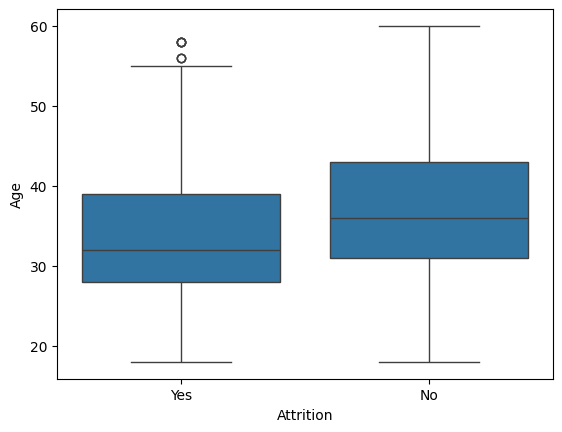



Para variável Attrition ---> p_value=5.867221214542806e-07 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [21]:
#Associação com Attrition:
ana_assoc_att_continua('Age', df)

In [22]:
#Associações variáveis qualitativas:
ana_assoc_continua(var_qual, 'Age', df)

Para variável BusinessTravel ---> p_value=0.8466937628116006 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Department ---> p_value=0.9304232160584913 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=2.2419356078980377e-20 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável EducationField ---> p_value=0.5959978704348263 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=1.6061831090556244e-81 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Gender ---> p_value=0.9869216072415259 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobRole ---> p_value=2.8456139685983256e-41 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para vari

In [23]:
#Associações variáveis discreta:
ana_assoc_continua(var_quant_discreta, 'Age', df)

Para variável EnvironmentSatisfaction ---> p_value=0.9853307567298851 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobInvolvement ---> p_value=0.9754022802979906 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobSatisfaction ---> p_value=0.9999181757325408 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável NumCompaniesWorked ---> p_value=6.187103671961605e-38 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável PerformanceRating ---> p_value=0.9999999045089636 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável RelationshipSatisfaction ---> p_value=0.9451643351546074 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável TrainingTimesLastYear ---> p_value=0.9493312249060593 > 0.05. Não rejeita H0:

####DistanceFromHome

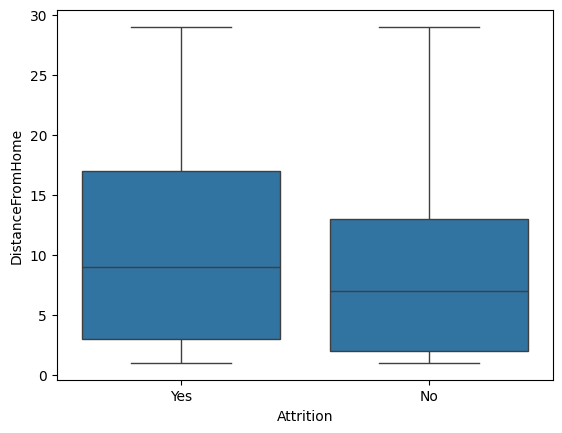



Para variável Attrition ---> p_value=0.29049699976507043 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



In [24]:
ana_assoc_att_continua('DistanceFromHome', df)

In [25]:
ana_assoc_continua(var_qual, 'DistanceFromHome', df)

Para variável BusinessTravel ---> p_value=0.8270269815851281 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Department ---> p_value=0.9406263706044796 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=0.9722493391143487 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável EducationField ---> p_value=0.9775225473663472 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=0.12097796631027931 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Gender ---> p_value=0.9991106488846738 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobRole ---> p_value=0.8923425120113627 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correl

In [26]:
ana_assoc_continua(var_quant_discreta, 'DistanceFromHome', df)

Para variável EnvironmentSatisfaction ---> p_value=0.9999885869017224 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobInvolvement ---> p_value=0.7492342054155308 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobSatisfaction ---> p_value=0.9502549688064419 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável NumCompaniesWorked ---> p_value=0.9503333298833991 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável PerformanceRating ---> p_value=0.9894333563944201 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável RelationshipSatisfaction ---> p_value=0.9999757040393124 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável TrainingTimesLastYear ---> p_value=0.7502267482133245 > 0.05. Não rejei

####MonthlyIncome

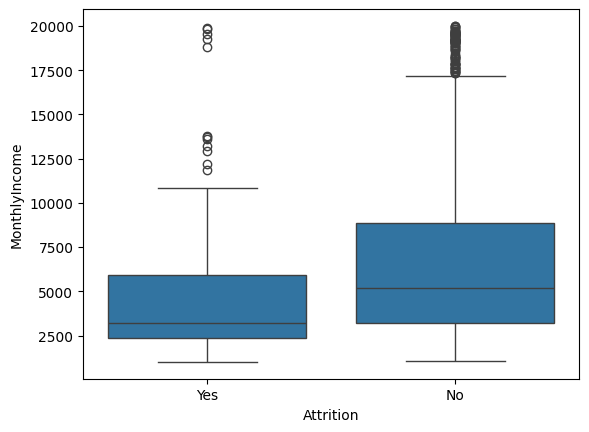



Para variável Attrition ---> p_value=3.866338975854176e-11 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [27]:
ana_assoc_att_continua('MonthlyIncome', df)

In [28]:
ana_assoc_continua(var_qual, 'MonthlyIncome', df)

Para variável BusinessTravel ---> p_value=0.9990793878566663 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Department ---> p_value=5.481125732879006e-12 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Education ---> p_value=8.308812539864947e-05 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável EducationField ---> p_value=0.001714468688465678 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável JobLevel ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Gender ---> p_value=0.9639856737039021 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobRole ---> p_value=2.359595032783758e-265 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável MaritalStatus ---> p_value=0

In [29]:
ana_assoc_continua(var_quant_discreta, 'MonthlyIncome', df)

Para variável EnvironmentSatisfaction ---> p_value=0.9866864593742486 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobInvolvement ---> p_value=0.835087033839156 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobSatisfaction ---> p_value=0.8300441629793571 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável NumCompaniesWorked ---> p_value=3.3735210143722924e-10 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável PerformanceRating ---> p_value=0.8616641479495921 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável RelationshipSatisfaction ---> p_value=0.09114475425828583 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável TrainingTimesLastYear ---> p_value=0.9904655984165811 > 0.05. Não rejeita H0

####PercentSalaryHike

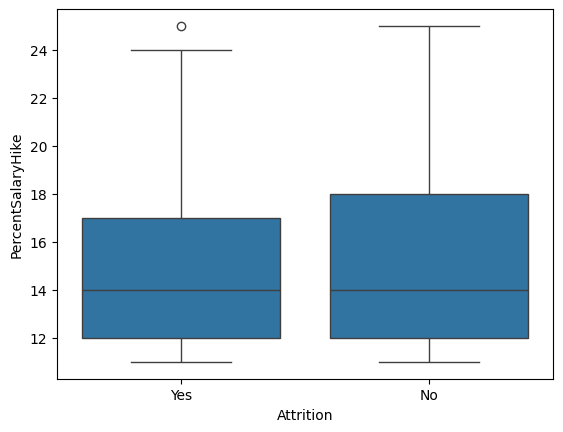



Para variável Attrition ---> p_value=0.9503833201463284 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



In [30]:
ana_assoc_att_continua('PercentSalaryHike', df)

In [31]:
ana_assoc_continua(var_qual, 'PercentSalaryHike', df)

Para variável BusinessTravel ---> p_value=0.7579805918967308 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Department ---> p_value=0.987726990413571 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=0.9986211728030799 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável EducationField ---> p_value=0.9925854823594353 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=0.9923914539352473 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Gender ---> p_value=0.8421989061076525 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobRole ---> p_value=0.99040195420018 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação

In [32]:
ana_assoc_continua(var_quant_discreta, 'PercentSalaryHike', df)

Para variável EnvironmentSatisfaction ---> p_value=0.9996366335855383 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobInvolvement ---> p_value=0.640364900005185 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobSatisfaction ---> p_value=0.9873982424352659 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável NumCompaniesWorked ---> p_value=0.9866073553091139 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável PerformanceRating ---> p_value=1.2044645211763309e-217 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável RelationshipSatisfaction ---> p_value=0.886220776344609 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável TrainingTimesLastYear ---> p_value=0.9982876043532055 > 0.05. Não rejeita H0:

####TotalWorkingYears

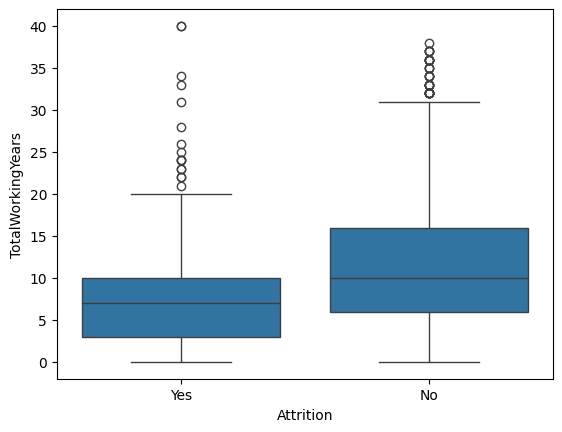



Para variável Attrition ---> p_value=1.629230799091115e-07 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [33]:
ana_assoc_att_continua('TotalWorkingYears', df)

In [34]:
ana_assoc_continua(var_qual, 'TotalWorkingYears', df)

Para variável BusinessTravel ---> p_value=0.9043554700712899 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Department ---> p_value=0.9641187600103344 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=1.6259338086218494e-05 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável EducationField ---> p_value=0.9910379963981925 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=3.343548306659533e-201 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Gender ---> p_value=0.8126837401741712 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobRole ---> p_value=2.4269404538891008e-113 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para var

In [35]:
ana_assoc_continua(var_quant_discreta, 'TotalWorkingYears', df)

Para variável EnvironmentSatisfaction ---> p_value=0.976384078965648 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobInvolvement ---> p_value=0.8242356049582282 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobSatisfaction ---> p_value=0.8456747762437481 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável NumCompaniesWorked ---> p_value=1.9199586718054955e-38 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável PerformanceRating ---> p_value=0.7887716750937794 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável RelationshipSatisfaction ---> p_value=0.9061026226953063 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável TrainingTimesLastYear ---> p_value=0.36057557495006626 > 0.05. Não rejeita H0

####YearsAtCompany

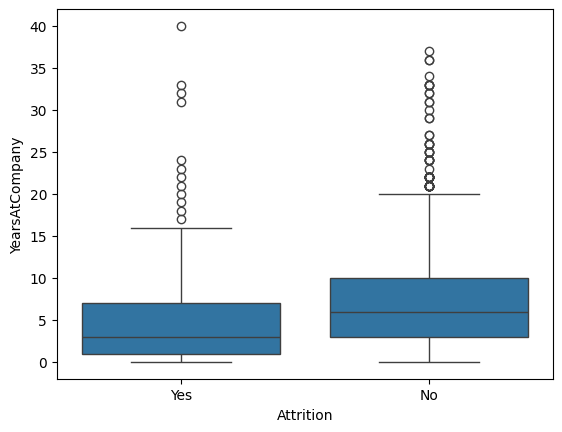



Para variável Attrition ---> p_value=3.5360578690272036e-08 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [36]:
ana_assoc_att_continua('YearsAtCompany', df)

In [37]:
ana_assoc_continua(var_qual, 'YearsAtCompany', df)

Para variável BusinessTravel ---> p_value=0.984139181509486 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Department ---> p_value=0.9814109506655126 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=0.7131128729025428 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável EducationField ---> p_value=0.9626987473359677 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=1.519580636404055e-64 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Gender ---> p_value=0.9944620959635233 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobRole ---> p_value=2.5368387262098933e-34 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para v

In [38]:
ana_assoc_continua(var_quant_discreta, 'YearsAtCompany', df)

Para variável EnvironmentSatisfaction ---> p_value=0.6134011353454467 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobInvolvement ---> p_value=0.910867173022036 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobSatisfaction ---> p_value=0.9999263935787973 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável NumCompaniesWorked ---> p_value=2.3933062631835772e-09 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável PerformanceRating ---> p_value=0.9979163489519179 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável RelationshipSatisfaction ---> p_value=0.905388348885379 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável TrainingTimesLastYear ---> p_value=0.9931167901256204 > 0.05. Não rejeita H0: 

####YearsInCurrentRole

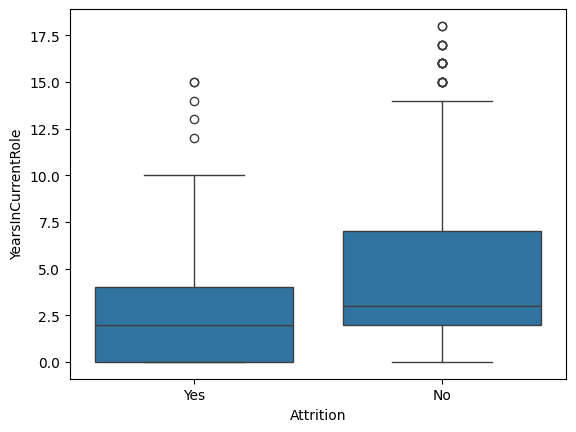



Para variável Attrition ---> p_value=2.0196725879761874e-06 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [39]:
ana_assoc_att_continua('YearsInCurrentRole', df)

In [40]:
ana_assoc_continua(var_qual, 'YearsInCurrentRole', df)

Para variável BusinessTravel ---> p_value=0.9988155651557625 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Department ---> p_value=0.6857318655902005 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=0.961653809172956 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável EducationField ---> p_value=0.9968509310613909 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=1.118433955454218e-46 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Gender ---> p_value=0.982944639362368 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobRole ---> p_value=1.0853709327403867e-20 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para va

In [41]:
ana_assoc_continua(var_quant_discreta, 'YearsInCurrentRole', df)

Para variável EnvironmentSatisfaction ---> p_value=0.9547712477179421 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobInvolvement ---> p_value=0.9928776176388341 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobSatisfaction ---> p_value=0.9990933680223697 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável NumCompaniesWorked ---> p_value=0.01137028739733854 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável PerformanceRating ---> p_value=0.922343240376575 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável RelationshipSatisfaction ---> p_value=0.8888813730091949 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável TrainingTimesLastYear ---> p_value=0.9681655849607675 > 0.05. Não rejeita H0: Ac

####YearsSinceLastPromotion

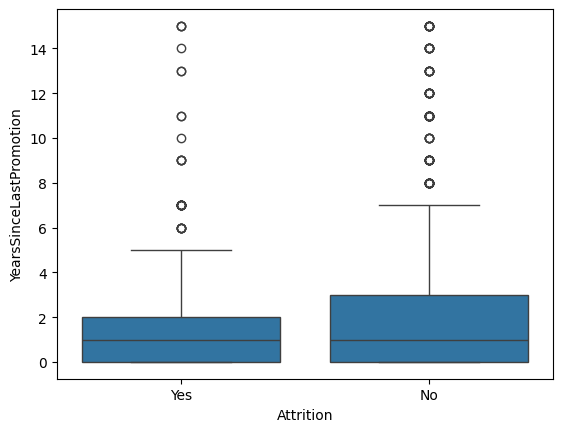



Para variável Attrition ---> p_value=0.5110666065939244 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



In [42]:
ana_assoc_att_continua('YearsSinceLastPromotion', df)

In [43]:
ana_assoc_continua(var_qual, 'YearsSinceLastPromotion', df)

Para variável BusinessTravel ---> p_value=0.9478607215559114 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Department ---> p_value=0.9374934421760044 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=0.9228924167563278 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável EducationField ---> p_value=0.9844535175396542 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=1.6233725387003142e-23 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Gender ---> p_value=0.942429166771174 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobRole ---> p_value=1.0719122041721855e-10 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para 

In [44]:
ana_assoc_continua(var_quant_discreta, 'YearsSinceLastPromotion', df)

Para variável EnvironmentSatisfaction ---> p_value=0.8298052590016824 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobInvolvement ---> p_value=0.9921219650800998 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobSatisfaction ---> p_value=0.99896631102761 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável NumCompaniesWorked ---> p_value=0.5119172495443445 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável PerformanceRating ---> p_value=0.9436545615572265 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável RelationshipSatisfaction ---> p_value=0.3552400317866119 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável TrainingTimesLastYear ---> p_value=0.9925256159745086 > 0.05. Não rejeita

####YearsWithCurrManager

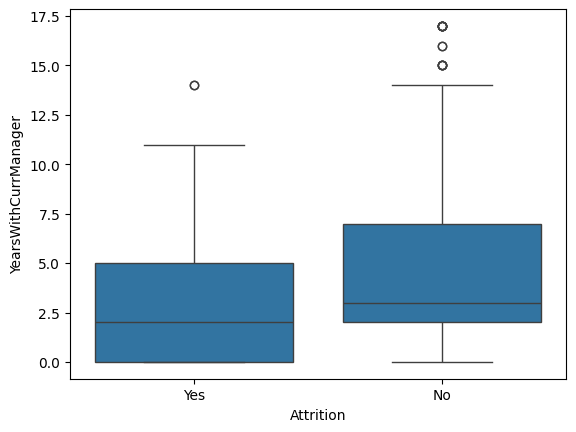



Para variável Attrition ---> p_value=0.00024203128907367925 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [45]:
ana_assoc_att_continua('YearsWithCurrManager', df)

In [46]:
ana_assoc_continua(var_qual, 'YearsWithCurrManager', df)

Para variável BusinessTravel ---> p_value=0.9388268771656918 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Department ---> p_value=0.9598105673986136 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=0.9497520527415886 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável EducationField ---> p_value=0.9978256750086111 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=1.5639468576400048e-42 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Gender ---> p_value=0.9970624715603197 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobRole ---> p_value=1.088646787599623e-23 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para 

In [47]:
ana_assoc_continua(var_quant_discreta, 'YearsWithCurrManager', df)

Para variável EnvironmentSatisfaction ---> p_value=0.9615515052181349 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobInvolvement ---> p_value=0.9077776150804129 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobSatisfaction ---> p_value=0.9997989347501733 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável NumCompaniesWorked ---> p_value=0.001209392491860415 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável PerformanceRating ---> p_value=0.8371367024232748 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável RelationshipSatisfaction ---> p_value=0.9216938091635632 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável TrainingTimesLastYear ---> p_value=0.9285908610975598 > 0.05. Não rejeita H0: 

##Variáveis quantitativas discretas

In [48]:
def ana_assoc_att_discreta(var_quant, data):
  '''
  Essa função será usada para analisar a associação entre a variável em questão e a variável Attrition.
  É usada com variáveis quantitativas e variável target.
  '''

  #Tabela de frequências:
  cross_tab_qual_quant_prop = pd.crosstab(index=data[var_quant], columns=data['Attrition'], margins=True, normalize=True)
  cross_tab_qual_quant = pd.crosstab(index=data[var_quant], columns=data['Attrition'], margins=True)

  #Teste Qui-Quadrado:
  from scipy.stats import chi2_contingency
  stat, p, dof, expected = chi2_contingency(cross_tab_qual_quant)

  #definindo significancia:
  significancia = 0.05

  if p <= significancia:
    print(f'Para variável Attrition ---> p_value={p} <= {significancia}. Rejeita H0: Aceita H1: As variáveis são dependentes.')
    print('Há correlação!\n')
    selected_features[var_quant] = p
  else:
    print(f'Para variável Attrition ---> p_value={p} > {significancia}. Não rejeita H0: Aceita H0: As variáveis são independentes.')
    print('Não há correlação!\n')

In [49]:
def ana_assoc_discreta(var_quant, var_fixa, data):
  '''
  Essa função será usada para analisar a associação entre a variável quantitativas discretas e variáveis quantitativas contínuas.
  '''
  var_corr = []

  for i in var_quant:
    #Criando os quartis:
    minimo = min(data[i])
    Q1 = np.percentile(data[i], 25)
    Q2 = np.percentile(data[i], 50)
    Q3 = np.percentile(data[i], 75)
    maximo = max(data[i])

    #Criando as faixas de Scoring:
    data.loc[(data[i] >= minimo) & (data[i] <= Q1), f'fx_{i}'] = f'{minimo} a {Q1}'
    data.loc[(data[i] > Q1) & (data[i] <= Q2), f'fx_{i}'] = f'{Q1} a {Q2}'
    data.loc[(data[i] > Q2) & (data[i] <= Q3), f'fx_{i}'] = f'{Q2} a {Q3}'
    data.loc[(data[i] > Q3) & (data[i] <= maximo), f'fx_{i}'] = f'{Q3} a {maximo}'

    #Tabela de frequências:
    cross_tab_qual_quant_prop = pd.crosstab(index=data[f'fx_{i}'], columns=data[var_fixa], margins=True, normalize=True)
    cross_tab_qual_quant = pd.crosstab(index=data[f'fx_{i}'], columns=data[var_fixa], margins=True)

    #Teste Qui-Quadrado:
    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(cross_tab_qual_quant)

    #definindo significancia:
    significancia = 0.05

    if p <= significancia:
      var_corr.append(i)
      print(f'Para variável {i} ---> p_value={p} <= {significancia}. Rejeita H0: Aceita H1: As variáveis são dependentes.')
      print('Há correlação!\n')
    else:
      print(f'Para variável {i} ---> p_value={p} > {significancia}. Não rejeita H0: Aceita H0: As variáveis são independentes.')
      print('Não há correlação!\n')

  print(f'As variáveis que possuem correlação com {var_quant} é(são): {var_corr}')

In [50]:
var_quant_discreta = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance']

###EnvironmentSatisfaction

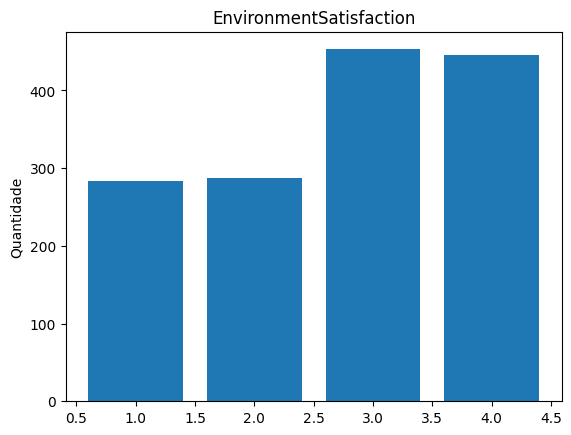

In [51]:
plt.bar(df['EnvironmentSatisfaction'].value_counts().index, df['EnvironmentSatisfaction'].value_counts())
plt.title('EnvironmentSatisfaction')
plt.ylabel('Quantidade')
plt.show()

In [52]:
ana_assoc_att_discreta('EnvironmentSatisfaction', df)

Para variável Attrition ---> p_value=0.004063164016917596 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



###JobInvolvement

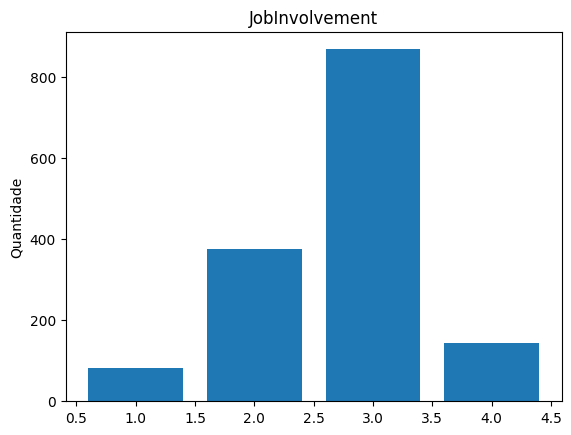

In [53]:
plt.bar(df['JobInvolvement'].value_counts().index, df['JobInvolvement'].value_counts())
plt.title('JobInvolvement')
plt.ylabel('Quantidade')
plt.show()

In [54]:
ana_assoc_att_discreta('JobInvolvement', df)

Para variável Attrition ---> p_value=0.0003891928706897907 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



###JobSatisfaction

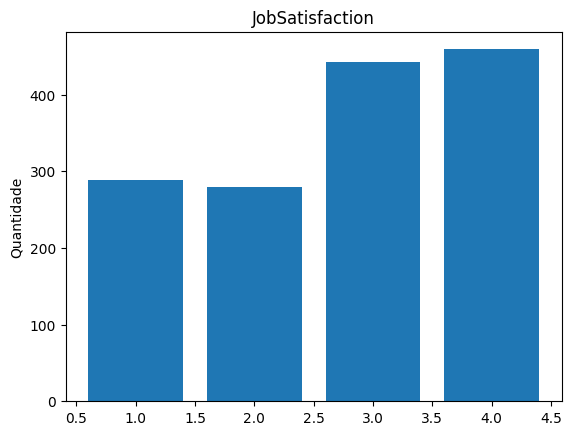

In [55]:
plt.bar(df['JobSatisfaction'].value_counts().index, df['JobSatisfaction'].value_counts())
plt.title('JobSatisfaction')
plt.ylabel('Quantidade')
plt.show()

In [56]:
ana_assoc_att_discreta('JobSatisfaction', df)

Para variável Attrition ---> p_value=0.025259004411587415 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



###NumCompaniesWorked

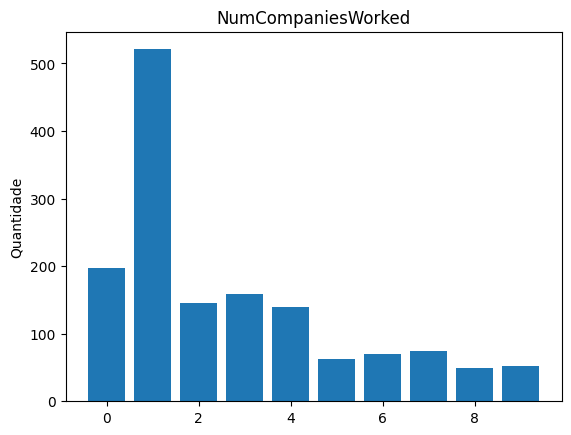

In [57]:
plt.bar(df['NumCompaniesWorked'].value_counts().index, df['NumCompaniesWorked'].value_counts())
plt.title('NumCompaniesWorked')
plt.ylabel('Quantidade')
plt.show()

In [58]:
ana_assoc_att_discreta('NumCompaniesWorked', df)

Para variável Attrition ---> p_value=0.1744203286724675 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



###PerformanceRating

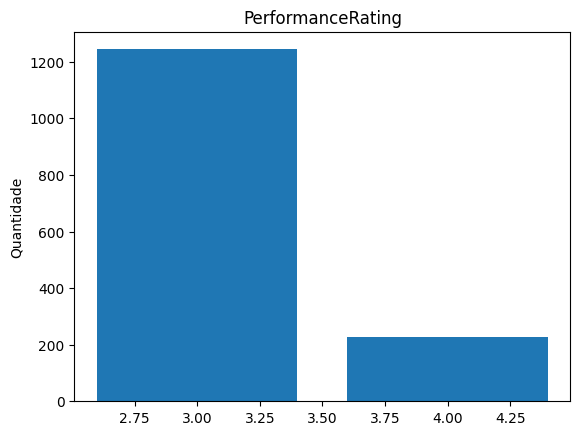

In [59]:
plt.bar(df['PerformanceRating'].value_counts().index, df['PerformanceRating'].value_counts())
plt.title('PerformanceRating')
plt.ylabel('Quantidade')
plt.show()

In [60]:
ana_assoc_att_discreta('PerformanceRating', df)

Para variável Attrition ---> p_value=0.9999812668775594 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



###RelationshipSatisfaction

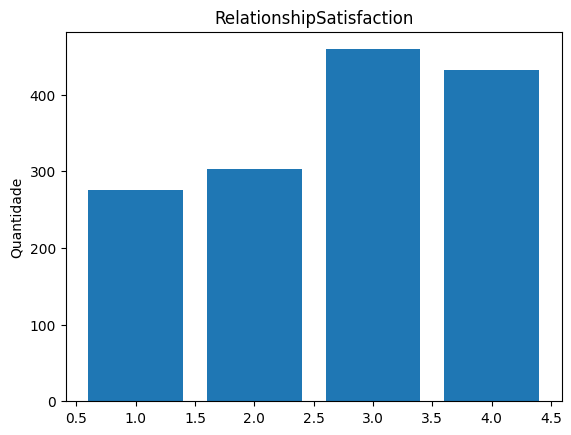

In [61]:
plt.bar(df['RelationshipSatisfaction'].value_counts().index, df['RelationshipSatisfaction'].value_counts())
plt.title('RelationshipSatisfaction')
plt.ylabel('Quantidade')
plt.show()

In [62]:
ana_assoc_att_discreta('RelationshipSatisfaction', df)

Para variável Attrition ---> p_value=0.7315271097260768 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



###TrainingTimesLastYear

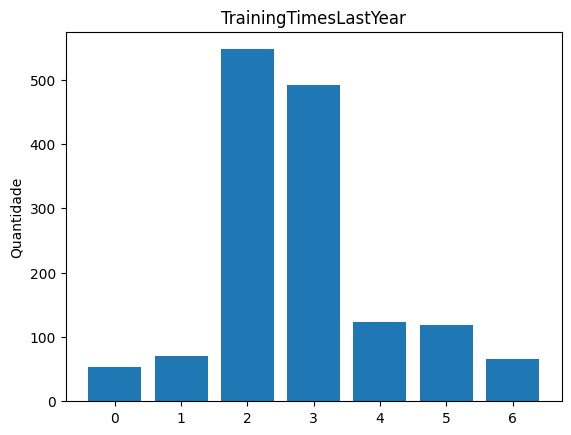

In [63]:
plt.bar(df['TrainingTimesLastYear'].value_counts().index, df['TrainingTimesLastYear'].value_counts())
plt.title('TrainingTimesLastYear')
plt.ylabel('Quantidade')
plt.show()

In [64]:
ana_assoc_att_discreta('TrainingTimesLastYear', df)

Para variável Attrition ---> p_value=0.3682172910091149 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



###WorkLifeBalance

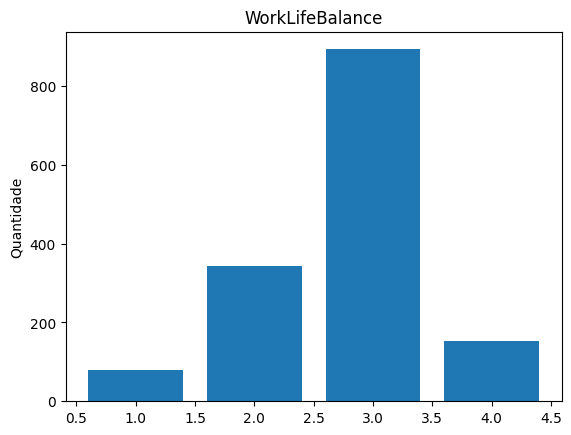

In [65]:
plt.bar(df['WorkLifeBalance'].value_counts().index, df['WorkLifeBalance'].value_counts())
plt.title('WorkLifeBalance')
plt.ylabel('Quantidade')
plt.show()

In [66]:
ana_assoc_att_discreta('WorkLifeBalance', df)

Para variável Attrition ---> p_value=0.037956412776488965 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



##Variáveis qualitativas

In [67]:
def ana_assoc_att_qual(var_qual, data):
  '''
  Essa função será usada para analisar a associação entre a variável em questão e a variável Attrition.
  É usada com variáveis quantitativas e variável target.
  '''

  #Tabela de frequências:
  cross_tab_qual_quant_prop = pd.crosstab(index=data[var_qual], columns=data['Attrition'], margins=True, normalize=True)
  cross_tab_qual_quant = pd.crosstab(index=data[var_qual], columns=data['Attrition'], margins=True)

  #Teste Qui-Quadrado:
  from scipy.stats import chi2_contingency
  stat, p, dof, expected = chi2_contingency(cross_tab_qual_quant)

  #definindo significancia:
  significancia = 0.05

  if p <= significancia:
    print(f'Para variável Attrition ---> p_value={p} <= {significancia}. Rejeita H0: Aceita H1: As variáveis são dependentes.')
    print('Há correlação!\n')
    selected_features[var_qual] = p
  else:
    print(f'Para variável Attrition ---> p_value={p} > {significancia}. Não rejeita H0: Aceita H0: As variáveis são independentes.')
    print('Não há correlação!\n')

In [68]:
def ana_assoc_qual(var_quant, var_fixa, data):
  '''
  Essa função será usada para analisar a associação entre a variável quantitativas discretas e variáveis quantitativas contínuas.
  '''
  var_corr = []

  for i in var_quant:

    #Tabela de frequências:
    cross_tab_qual_quant_prop = pd.crosstab(index=data[f'{i}'], columns=data[var_fixa], margins=True, normalize=True)
    cross_tab_qual_quant = pd.crosstab(index=data[f'{i}'], columns=data[var_fixa], margins=True)

    #Teste Qui-Quadrado:
    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(cross_tab_qual_quant)

    #definindo significancia:
    significancia = 0.05

    if p <= significancia:
      var_corr.append(i)
      print(f'Para variável {i} ---> p_value={p} <= {significancia}. Rejeita H0: Aceita H1: As variáveis são dependentes.')
      print('Há correlação!\n')
    else:
      print(f'Para variável {i} ---> p_value={p} > {significancia}. Não rejeita H0: Aceita H0: As variáveis são independentes.')
      print('Não há correlação!\n')

  print(f'As variáveis que possuem correlação com {var_fixa} é(são): {var_quant}')

In [69]:
var_qual_ordinais = ['BusinessTravel' ,'Education', 'JobLevel', 'StockOptionLevel']
var_qual_nominais = ['Department', 'EducationField', 'JobRole', 'Gender', 'MaritalStatus', 'OverTime']

###BusinessTravel

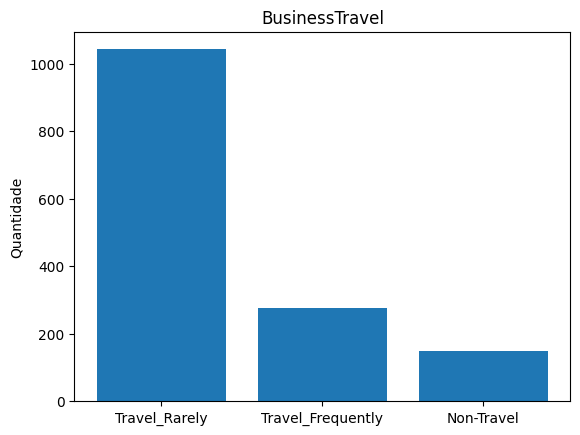

In [70]:
plt.bar(df['BusinessTravel'].value_counts().index, df['BusinessTravel'].value_counts())
plt.title('BusinessTravel')
plt.ylabel('Quantidade')
plt.show()

In [71]:
ana_assoc_att_qual('BusinessTravel', df)

Para variável Attrition ---> p_value=0.00048340563090315926 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [72]:
ana_assoc_qual(var_qual_ordinais, 'BusinessTravel', df)

Para variável BusinessTravel ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Education ---> p_value=0.9692105911237571 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=0.9280296038975391 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável StockOptionLevel ---> p_value=0.9992127416280023 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

As variáveis que possuem correlação com BusinessTravel é(são): ['BusinessTravel', 'Education', 'JobLevel', 'StockOptionLevel']


###Education

In [73]:
df_educ = df['Education'].value_counts().sort_index(ascending=True)
df_educ

,count
Education,
1,170
2,282
3,572
4,398
5,48


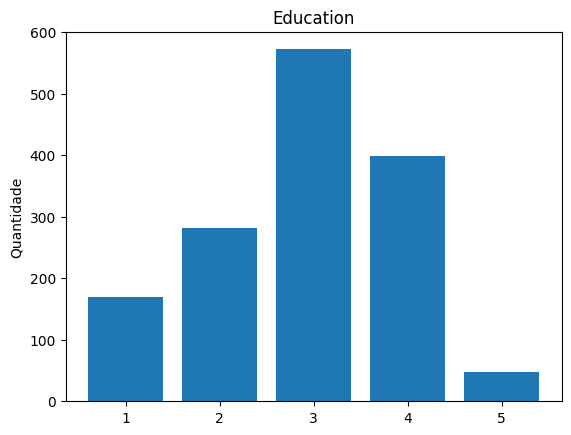

In [74]:
plt.bar(df_educ.index, df_educ.values)
plt.title('Education')
plt.ylabel('Quantidade')
plt.show()

In [75]:
ana_assoc_att_qual('Education', df)

Para variável Attrition ---> p_value=0.9796294822257321 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



In [76]:
ana_assoc_qual(var_qual_ordinais, 'Education', df)

Para variável BusinessTravel ---> p_value=0.9692105911237571 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável JobLevel ---> p_value=7.185776372725673e-05 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável StockOptionLevel ---> p_value=0.7681465425898126 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

As variáveis que possuem correlação com Education é(são): ['BusinessTravel', 'Education', 'JobLevel', 'StockOptionLevel']


###JobLevel

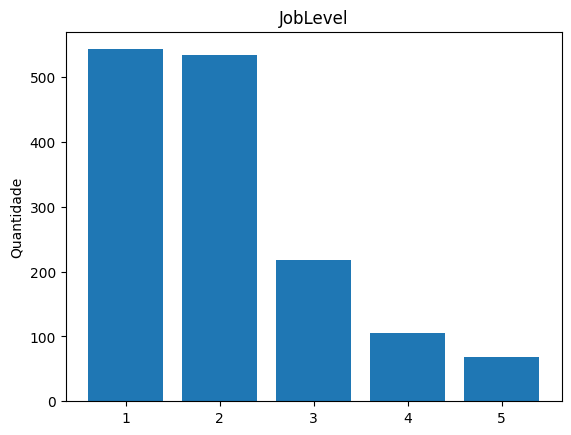

In [77]:
plt.bar(df['JobLevel'].value_counts().index, df['JobLevel'].value_counts())
plt.title('JobLevel')
plt.ylabel('Quantidade')
plt.show()

In [78]:
agrupado = df.groupby('JobLevel')['Attrition'].value_counts(normalize=True)
agrupado

JobLevel  Attrition
1         No           0.736648
          Yes          0.263352
2         No           0.902622
          Yes          0.097378
3         No           0.853211
          Yes          0.146789
4         No           0.952830
          Yes          0.047170
5         No           0.927536
          Yes          0.072464
Name: proportion, dtype: float64

In [79]:
ana_assoc_att_qual('JobLevel', df)

Para variável Attrition ---> p_value=1.4369328681553176e-11 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [80]:
ana_assoc_qual(var_qual_ordinais, 'JobLevel', df)

Para variável BusinessTravel ---> p_value=0.9280296038975392 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=7.185776372725673e-05 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável JobLevel ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável StockOptionLevel ---> p_value=0.03166106784457297 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

As variáveis que possuem correlação com JobLevel é(são): ['BusinessTravel', 'Education', 'JobLevel', 'StockOptionLevel']


###StockOptionLevel

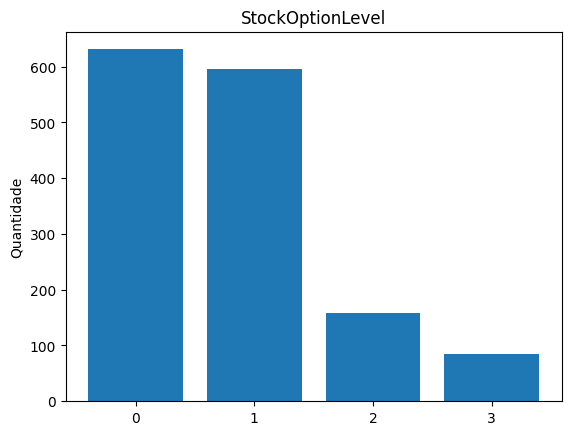

In [81]:
plt.bar(df['StockOptionLevel'].value_counts().index, df['StockOptionLevel'].value_counts())
plt.title('StockOptionLevel')
plt.ylabel('Quantidade')
plt.show()

In [82]:
ana_assoc_att_qual('StockOptionLevel', df)

Para variável Attrition ---> p_value=3.556711912437838e-10 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [83]:
ana_assoc_qual(var_qual_ordinais, 'StockOptionLevel', df)

Para variável BusinessTravel ---> p_value=0.9992127416280023 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=0.7681465425898126 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=0.03166106784457297 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável StockOptionLevel ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

As variáveis que possuem correlação com StockOptionLevel é(são): ['BusinessTravel', 'Education', 'JobLevel', 'StockOptionLevel']


###Department

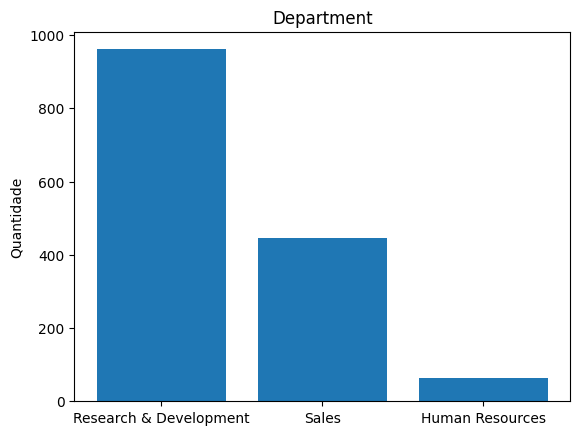

In [84]:
plt.bar(df['Department'].value_counts().index, df['Department'].value_counts())
plt.title('Department')
plt.ylabel('Quantidade')
plt.show()

In [85]:
ana_assoc_att_qual('Department', df)

Para variável Attrition ---> p_value=0.094889413229254 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



###EducationField

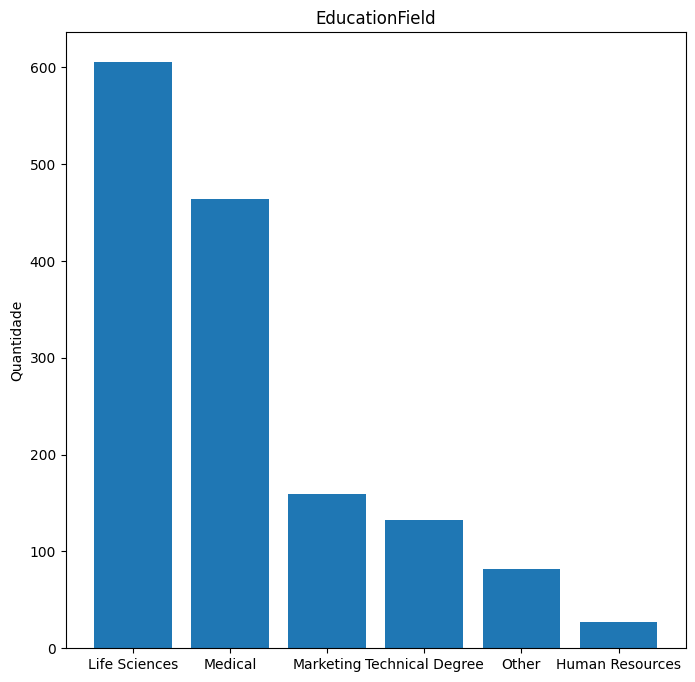

In [86]:
plt.figure(figsize=(8,8))
plt.bar(df['EducationField'].value_counts().index, df['EducationField'].value_counts())
plt.title('EducationField')
plt.ylabel('Quantidade')
plt.show()

In [87]:
ana_assoc_att_qual('EducationField', df)

Para variável Attrition ---> p_value=0.1901085546245391 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



###JobRole

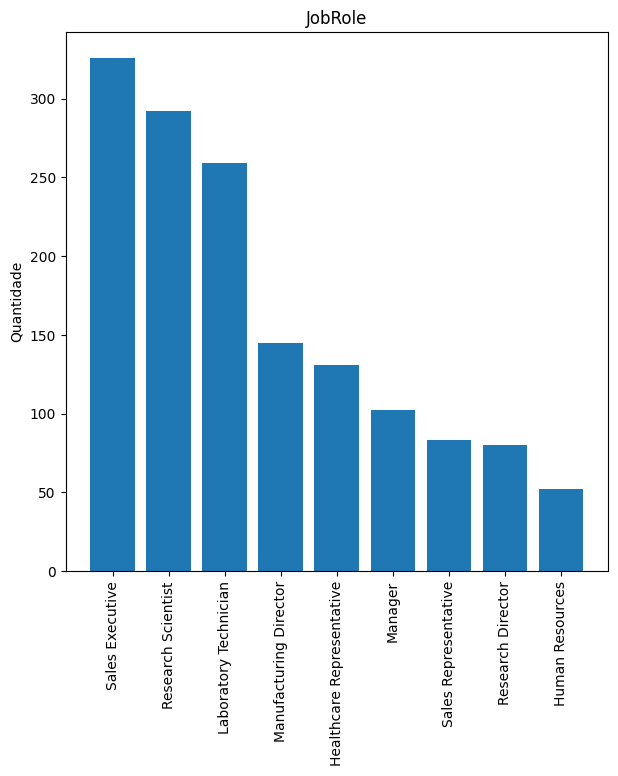

In [88]:
plt.figure(figsize=(7,7))
plt.bar(df['JobRole'].value_counts().index, df['JobRole'].value_counts())
plt.title('JobRole')
plt.ylabel('Quantidade')
plt.tick_params(axis="x", labelrotation=90)
plt.show()

In [89]:
ana_assoc_att_qual('JobRole', df)

Para variável Attrition ---> p_value=6.925877932979031e-11 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [90]:
ana_assoc_qual(var_qual_ordinais, 'JobRole', df)

Para variável BusinessTravel ---> p_value=0.9943418241214779 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=0.3703988514403405 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável StockOptionLevel ---> p_value=0.7255740599829974 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

As variáveis que possuem correlação com JobRole é(são): ['BusinessTravel', 'Education', 'JobLevel', 'StockOptionLevel']


###Gender

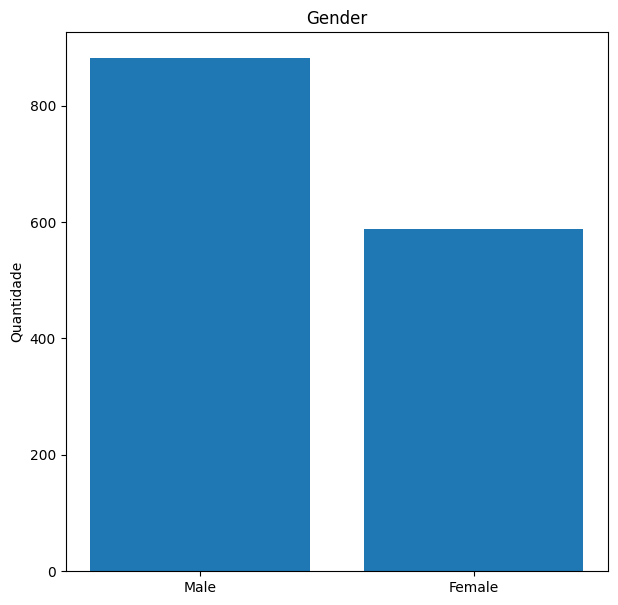

In [91]:
plt.figure(figsize=(7,7))
plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts())
plt.title('Gender')
plt.ylabel('Quantidade')
plt.show()

In [92]:
ana_assoc_att_qual('Gender', df)

Para variável Attrition ---> p_value=0.8655661914618858 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



###MaritalStatus

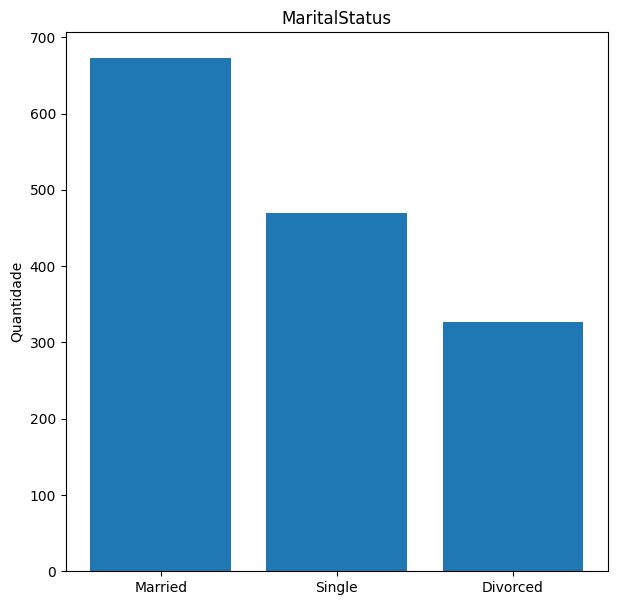

In [93]:
plt.figure(figsize=(7,7))
plt.bar(df['MaritalStatus'].value_counts().index, df['MaritalStatus'].value_counts())
plt.title('MaritalStatus')
plt.ylabel('Quantidade')
plt.show()

In [94]:
ana_assoc_att_qual('MaritalStatus', df)

Para variável Attrition ---> p_value=2.7465183491705955e-08 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [95]:
ana_assoc_qual(var_qual_ordinais, 'MaritalStatus', df)

Para variável BusinessTravel ---> p_value=0.5849954840287994 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Education ---> p_value=0.9748724748549222 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável JobLevel ---> p_value=0.5165193629297666 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável StockOptionLevel ---> p_value=4.7985089789354234e-206 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

As variáveis que possuem correlação com MaritalStatus é(são): ['BusinessTravel', 'Education', 'JobLevel', 'StockOptionLevel']


###OverTime

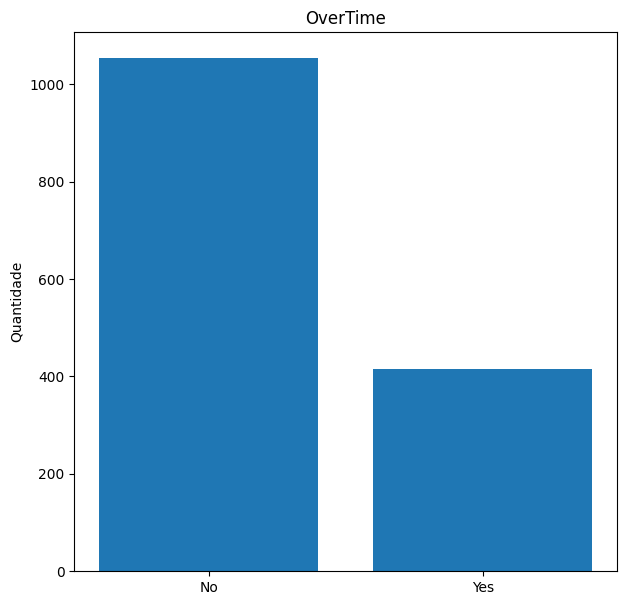

In [96]:
plt.figure(figsize=(7,7))
plt.bar(df['OverTime'].value_counts().index, df['OverTime'].value_counts())
plt.title('OverTime')
plt.ylabel('Quantidade')
plt.show()

In [97]:
ana_assoc_att_qual('OverTime', df)

Para variável Attrition ---> p_value=2.101784517286292e-18 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



#Seleção de features

##Análise estatística

In [153]:
selected_features

{'Age': 5.867221214542806e-07,
 'MonthlyIncome': 3.866338975854176e-11,
 'TotalWorkingYears': 1.629230799091115e-07,
 'YearsAtCompany': 3.5360578690272036e-08,
 'YearsInCurrentRole': 2.0196725879761874e-06,
 'YearsWithCurrManager': 0.00024203128907367925,
 'EnvironmentSatisfaction': 0.004063164016917596,
 'JobInvolvement': 0.0003891928706897907,
 'JobSatisfaction': 0.025259004411587415,
 'WorkLifeBalance': 0.037956412776488965,
 'BusinessTravel': 0.00048340563090315926,
 'JobLevel': 1.4369328681553176e-11,
 'StockOptionLevel': 3.556711912437838e-10,
 'JobRole': 6.925877932979031e-11,
 'MaritalStatus': 2.7465183491705955e-08,
 'OverTime': 2.101784517286292e-18}

1. Age, MonthlyIncome e TotalWorkingYears são multicolineares ---> MonthlyIncome tem maior associação com Attrition e por isso será mantida.
2. YearsAtCompany, YearsInCurrentRole e YearsWithCurrManager ---> YearsAtCompany tem maior associação com Attrition e por isso será mantida.

In [154]:
selected_features_ordered = ['OverTime', 'JobLevel', 'JobRole', 'MonthlyIncome', 'StockOptionLevel', 'MaritalStatus', 'YearsAtCompany', 'TotalWorkingYears', 'Age',
                             'YearsInCurrentRole', 'BusinessTravel', 'JobInvolvement']

In [155]:
#selected_features_ordered = ['OverTime', 'JobLevel', 'MaritalStatus', 'YearsInCurrentRole', 'BusinessTravel', 'JobInvolvement']

In [156]:
df_selected = df[selected_features_ordered]
df_selected.head()

,OverTime,JobLevel,JobRole,MonthlyIncome,StockOptionLevel,MaritalStatus,YearsAtCompany,TotalWorkingYears,Age,YearsInCurrentRole,BusinessTravel,JobInvolvement
0,Yes,2,Sales Executive,5993.0,0,Single,6.0,8.0,41.0,4.0,Travel_Rarely,3
1,No,2,Research Scientist,5130.0,1,Married,10.0,10.0,49.0,7.0,Travel_Frequently,2
2,Yes,1,Laboratory Technician,2090.0,0,Single,0.0,7.0,37.0,0.0,Travel_Rarely,2
3,Yes,1,Research Scientist,2909.0,0,Married,8.0,8.0,33.0,7.0,Travel_Frequently,3
4,No,1,Laboratory Technician,3468.0,1,Married,2.0,6.0,27.0,2.0,Travel_Rarely,3


In [157]:
df_selected = pd.concat([df_selected, df['Attrition']], axis=1)
df_selected.head()

,OverTime,JobLevel,JobRole,MonthlyIncome,StockOptionLevel,MaritalStatus,YearsAtCompany,TotalWorkingYears,Age,YearsInCurrentRole,BusinessTravel,JobInvolvement,Attrition
0,Yes,2,Sales Executive,5993.0,0,Single,6.0,8.0,41.0,4.0,Travel_Rarely,3,Yes
1,No,2,Research Scientist,5130.0,1,Married,10.0,10.0,49.0,7.0,Travel_Frequently,2,No
2,Yes,1,Laboratory Technician,2090.0,0,Single,0.0,7.0,37.0,0.0,Travel_Rarely,2,Yes
3,Yes,1,Research Scientist,2909.0,0,Married,8.0,8.0,33.0,7.0,Travel_Frequently,3,No
4,No,1,Laboratory Technician,3468.0,1,Married,2.0,6.0,27.0,2.0,Travel_Rarely,3,No


##RandomForest

#Preprocessamento

##Regressão Logística

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop('Attrition', axis=1), df_selected['Attrition'], test_size=0.3, random_state=42, stratify=df_selected['Attrition'])

In [160]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer

In [161]:
#Instância OneHotEncoder:
encoder = OneHotEncoder(drop='first', sparse_output=False)

#Make_column_transformer:
transformer_lr = make_column_transformer(
    (encoder, ['OverTime', 'JobLevel', 'JobRole', 'MaritalStatus', 'BusinessTravel']),
     remainder='passthrough',
     sparse_threshold=0
)

X_train_transformed_lr = transformer_lr.fit_transform(X_train)
X_test_transformed_lr = transformer_lr.transform(X_test)

X_train_transformed_lr = pd.DataFrame(X_train_transformed_lr, columns=transformer_lr.get_feature_names_out())
X_test_transformed_lr = pd.DataFrame(X_test_transformed_lr, columns=transformer_lr.get_feature_names_out())

X_train_transformed_lr.head()

,onehotencoder__OverTime_Yes,onehotencoder__JobLevel_2,onehotencoder__JobLevel_3,onehotencoder__JobLevel_4,onehotencoder__JobLevel_5,onehotencoder__JobRole_Human Resources,onehotencoder__JobRole_Laboratory Technician,onehotencoder__JobRole_Manager,onehotencoder__JobRole_Manufacturing Director,onehotencoder__JobRole_Research Director,onehotencoder__JobRole_Research Scientist,onehotencoder__JobRole_Sales Executive,onehotencoder__JobRole_Sales Representative,onehotencoder__MaritalStatus_Married,onehotencoder__MaritalStatus_Single,onehotencoder__BusinessTravel_Travel_Frequently,onehotencoder__BusinessTravel_Travel_Rarely,remainder__MonthlyIncome,remainder__StockOptionLevel,remainder__YearsAtCompany,remainder__TotalWorkingYears,remainder__Age,remainder__YearsInCurrentRole,remainder__JobInvolvement
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2552.0,0,1.0,1.0,19.0,1.0,3
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13610.0,0,7.0,15.0,33.0,6.0,3
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3149.0,1,5.0,9.0,52.0,2.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2580.0,0,4.0,6.0,27.0,2.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2231.0,1,4.0,6.0,34.0,3.0,3


In [162]:
scaler = MinMaxScaler()

X_train_transformed_lr = scaler.fit_transform(X_train_transformed_lr)
X_train_transformed_lr = pd.DataFrame(X_train_transformed_lr, columns=transformer_lr.get_feature_names_out())

X_test_transformed_lr = scaler.transform(X_test_transformed_lr)
X_test_transformed_lr = pd.DataFrame(X_test_transformed_lr, columns=transformer_lr.get_feature_names_out())

X_train_transformed_lr.head()

,onehotencoder__OverTime_Yes,onehotencoder__JobLevel_2,onehotencoder__JobLevel_3,onehotencoder__JobLevel_4,onehotencoder__JobLevel_5,onehotencoder__JobRole_Human Resources,onehotencoder__JobRole_Laboratory Technician,onehotencoder__JobRole_Manager,onehotencoder__JobRole_Manufacturing Director,onehotencoder__JobRole_Research Director,onehotencoder__JobRole_Research Scientist,onehotencoder__JobRole_Sales Executive,onehotencoder__JobRole_Sales Representative,onehotencoder__MaritalStatus_Married,onehotencoder__MaritalStatus_Single,onehotencoder__BusinessTravel_Travel_Frequently,onehotencoder__BusinessTravel_Travel_Rarely,remainder__MonthlyIncome,remainder__StockOptionLevel,remainder__YearsAtCompany,remainder__TotalWorkingYears,remainder__Age,remainder__YearsInCurrentRole,remainder__JobInvolvement
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.081365,0.000000,0.027027,0.025,0.023810,0.058824,0.666667
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.664470,0.000000,0.189189,0.375,0.357143,0.352941,0.666667
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.112845,0.333333,0.135135,0.225,0.809524,0.117647,0.666667
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.082841,0.000000,0.108108,0.150,0.214286,0.117647,0.666667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.064438,0.333333,0.108108,0.150,0.380952,0.176471,0.666667


In [163]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

##Outros

In [164]:
#Instância OneHotEncoder:
encoder = OneHotEncoder(drop='first', sparse_output=False)

#Make_column_transformer:
transformer = make_column_transformer(
    (encoder, ['OverTime', 'JobLevel', 'JobRole', 'MaritalStatus', 'BusinessTravel']),
     remainder='passthrough',
     sparse_threshold=0
)

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())
X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformer.get_feature_names_out())

X_train_transformed.head()

,onehotencoder__OverTime_Yes,onehotencoder__JobLevel_2,onehotencoder__JobLevel_3,onehotencoder__JobLevel_4,onehotencoder__JobLevel_5,onehotencoder__JobRole_Human Resources,onehotencoder__JobRole_Laboratory Technician,onehotencoder__JobRole_Manager,onehotencoder__JobRole_Manufacturing Director,onehotencoder__JobRole_Research Director,onehotencoder__JobRole_Research Scientist,onehotencoder__JobRole_Sales Executive,onehotencoder__JobRole_Sales Representative,onehotencoder__MaritalStatus_Married,onehotencoder__MaritalStatus_Single,onehotencoder__BusinessTravel_Travel_Frequently,onehotencoder__BusinessTravel_Travel_Rarely,remainder__MonthlyIncome,remainder__StockOptionLevel,remainder__YearsAtCompany,remainder__TotalWorkingYears,remainder__Age,remainder__YearsInCurrentRole,remainder__JobInvolvement
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2552.0,0,1.0,1.0,19.0,1.0,3
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13610.0,0,7.0,15.0,33.0,6.0,3
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3149.0,1,5.0,9.0,52.0,2.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2580.0,0,4.0,6.0,27.0,2.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2231.0,1,4.0,6.0,34.0,3.0,3


In [165]:
scaler = MinMaxScaler()

X_train_transformed = scaler.fit_transform(X_train_transformed)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())

X_test_transformed = scaler.transform(X_test_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformer.get_feature_names_out())

X_train_transformed.head()

,onehotencoder__OverTime_Yes,onehotencoder__JobLevel_2,onehotencoder__JobLevel_3,onehotencoder__JobLevel_4,onehotencoder__JobLevel_5,onehotencoder__JobRole_Human Resources,onehotencoder__JobRole_Laboratory Technician,onehotencoder__JobRole_Manager,onehotencoder__JobRole_Manufacturing Director,onehotencoder__JobRole_Research Director,onehotencoder__JobRole_Research Scientist,onehotencoder__JobRole_Sales Executive,onehotencoder__JobRole_Sales Representative,onehotencoder__MaritalStatus_Married,onehotencoder__MaritalStatus_Single,onehotencoder__BusinessTravel_Travel_Frequently,onehotencoder__BusinessTravel_Travel_Rarely,remainder__MonthlyIncome,remainder__StockOptionLevel,remainder__YearsAtCompany,remainder__TotalWorkingYears,remainder__Age,remainder__YearsInCurrentRole,remainder__JobInvolvement
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.081365,0.000000,0.027027,0.025,0.023810,0.058824,0.666667
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.664470,0.000000,0.189189,0.375,0.357143,0.352941,0.666667
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.112845,0.333333,0.135135,0.225,0.809524,0.117647,0.666667
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.082841,0.000000,0.108108,0.150,0.214286,0.117647,0.666667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.064438,0.333333,0.108108,0.150,0.380952,0.176471,0.666667


#Modelo

In [166]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [167]:
def metrics(y, X, modelo):

  from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
  from sklearn.model_selection import cross_val_score, cross_val_predict
  import matplotlib.pyplot as plt

  #Classification report:

  y_pred = modelo.predict(X)
  print(f'Classification report:')
  print(classification_report(y, y_pred.round()))
  print('\n')

  #Matriz de confussão:
  print(f'Matriz de confusão:')
  sns.heatmap(confusion_matrix(y, y_pred.round()), annot=True, fmt='g')
  plt.show()
  print('\n')

  y_pred_proba = cross_val_predict(modelo, X, y, cv=3, method='predict_proba')
  y_pred_proba = y_pred_proba[:,1]

  print(f'ROC_CURVE:')
  fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
  plt.plot(fpr, tpr, linewidth=2, label=f'ROC SCORE = {roc_auc_score(y, y_pred_proba):.2f}')
  plt.plot([0,1], [0,1], "r--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")
  plt.legend(loc="lower right")
  plt.axis([0,1,0,1])
  plt.grid(True)

In [168]:
def metrics_cross_val(y, X, modelo):

  from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
  from sklearn.model_selection import cross_val_score, cross_val_predict
  import matplotlib.pyplot as plt

  #Classification report:

  y_pred = cross_val_predict(modelo, X, y, cv=3)
  print(f'Classification report:')
  print(classification_report(y, y_pred.round()))
  print('\n')

  #Matriz de confussão:
  print(f'Matriz de confusão:')
  sns.heatmap(confusion_matrix(y, y_pred.round()), annot=True, fmt='g')
  plt.show()
  print('\n')

  y_pred_proba = cross_val_predict(modelo, X, y, cv=3, method='predict_proba')
  y_pred_proba = y_pred_proba[:,1]

  print(f'ROC_CURVE:')
  fpr_log, tpr_log, thresholds_log = roc_curve(y, y_pred_proba)
  plt.plot(fpr_log, tpr_log, linewidth=2, label=f'ROC SCORE = {roc_auc_score(y, y_pred_proba):.2f}')
  plt.plot([0,1], [0,1], "r--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")
  plt.legend(loc="lower right")
  plt.axis([0,1,0,1])
  plt.grid(True)

In [169]:
def metrics_grid_search(y, X, modelo, par):

  from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
  from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
  import matplotlib.pyplot as plt

  #GridSearch
  grid_search = GridSearchCV(modelo, par, cv=3, scoring='f1', return_train_score=True)
  grid_search.fit(X, y)
  melhor_modelo = grid_search.best_estimator_
  print(f'Melhores parâmetros: {grid_search.best_params_}')


  #Classification report:

  y_pred = cross_val_predict(melhor_modelo, X, y, cv=3)
  print(f'Classification report:')
  print(classification_report(y, y_pred.round()))
  print('\n')

  #Matriz de confussão:
  print(f'Matriz de confusão:')
  sns.heatmap(confusion_matrix(y, y_pred.round()), annot=True, fmt='g')
  plt.show()
  print('\n')

  y_pred_proba = cross_val_predict(melhor_modelo, X, y, cv=3, method='predict_proba')
  y_pred_proba = y_pred_proba[:,1]

  print(f'ROC_CURVE:')
  fpr_log, tpr_log, thresholds_log = roc_curve(y, y_pred_proba)
  plt.plot(fpr_log, tpr_log, linewidth=2, label=f'ROC SCORE = {roc_auc_score(y, y_pred_proba):.2f}')
  plt.plot([0,1], [0,1], "r--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")
  plt.legend(loc="lower right")
  plt.axis([0,1,0,1])
  plt.grid(True)

##Regressão Logística

###StatsModels

In [170]:
import statsmodels.api as sm

X_train_transformed_cte = sm.add_constant(X_train_transformed_lr)
X_test_transformed_cte = sm.add_constant(X_test_transformed_lr)

logistica = sm.Logit(y_train, X_train_transformed_cte)
model_log = logistica.fit()
print(model_log.summary())

Optimization terminated successfully.
         Current function value: 0.322280
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1004
Method:                           MLE   Df Model:                           24
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.2706
Time:                        14:22:52   Log-Likelihood:                -331.63
converged:                       True   LL-Null:                       -454.67
Covariance Type:            nonrobust   LLR p-value:                 9.837e-39
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                             

###Sklearn

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
lr = LogisticRegression(class_weight={1:5})
lr.fit(X_train_transformed, y_train)

LogisticRegression(class_weight={1: 5})

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       863
           1       0.37      0.76      0.49       166

    accuracy                           0.75      1029
   macro avg       0.65      0.75      0.66      1029
weighted avg       0.85      0.75      0.78      1029



Matriz de confusão:


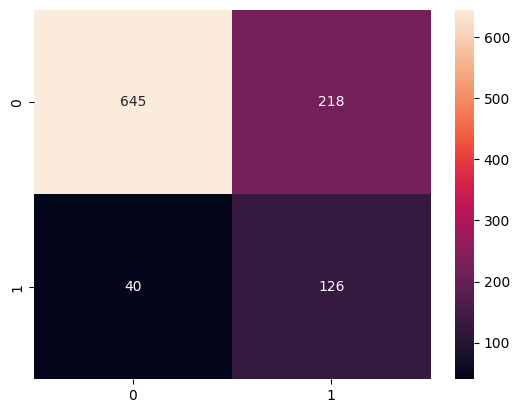



ROC_CURVE:


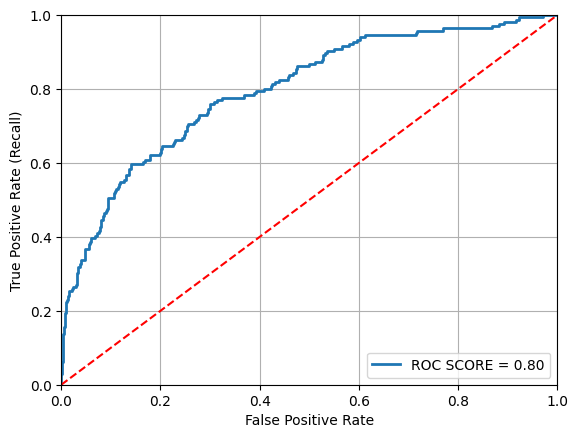

In [173]:
metrics(y_train, X_train_transformed, lr)

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       863
           1       0.35      0.69      0.46       166

    accuracy                           0.74      1029
   macro avg       0.64      0.72      0.64      1029
weighted avg       0.83      0.74      0.77      1029



Matriz de confusão:


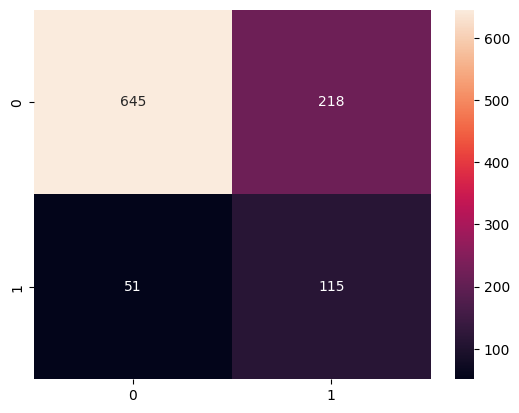



ROC_CURVE:


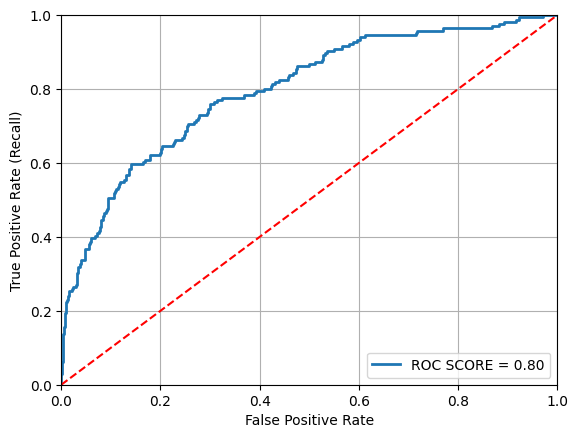

In [174]:
metrics_cross_val(y_train, X_train_transformed, lr)

####GridSearch

In [175]:
param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1],
    "solver": ['lbfgs', 'liblinear']
}

Melhores parâmetros: {'C': 0.1, 'solver': 'liblinear'}
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       863
           1       0.35      0.70      0.47       166

    accuracy                           0.74      1029
   macro avg       0.64      0.72      0.65      1029
weighted avg       0.84      0.74      0.77      1029



Matriz de confusão:


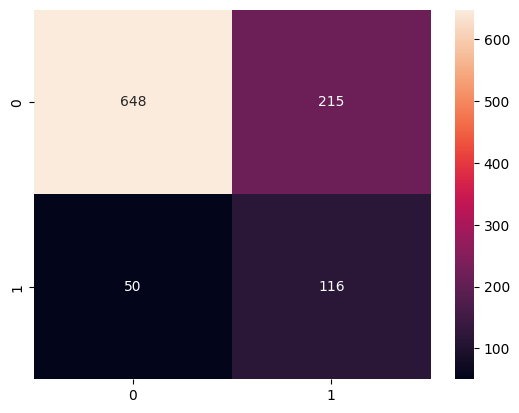



ROC_CURVE:


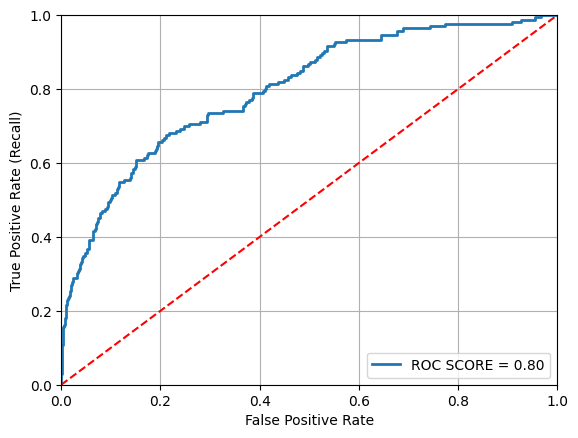

In [176]:
metrics_grid_search(y_train, X_train_transformed, lr, param_grid_lr)

##SVM

###Kernel Poly

In [177]:
from sklearn.svm import SVC

pipeline_svm_poly = Pipeline([
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=1, class_weight={1:5}, probability=True))
])

pipeline_svm_poly.fit(X_train_transformed, y_train)

Pipeline(steps=[('svm_clf',
                 SVC(C=1, class_weight={1: 5}, coef0=1, kernel='poly',
                     probability=True))])

####Dados treinamento

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       863
           1       0.54      0.89      0.67       166

    accuracy                           0.86      1029
   macro avg       0.76      0.87      0.79      1029
weighted avg       0.91      0.86      0.87      1029



Matriz de confusão:


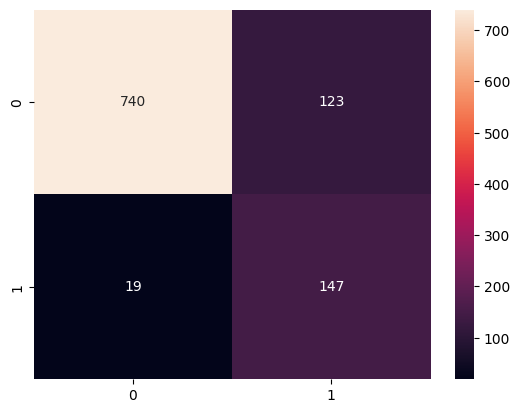



ROC_CURVE:


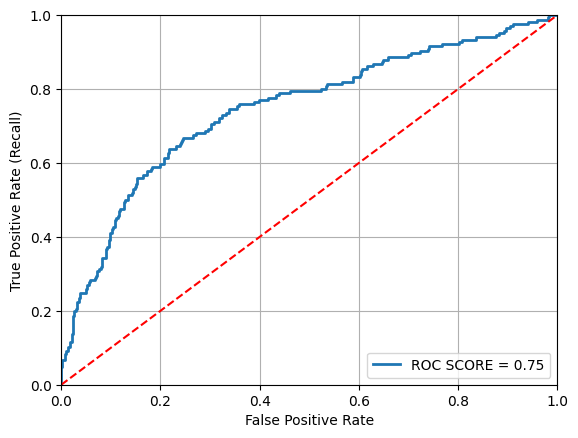

In [178]:
metrics(y_train, X_train_transformed, pipeline_svm_poly)

####Validação cruzada

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       863
           1       0.38      0.58      0.46       166

    accuracy                           0.78      1029
   macro avg       0.65      0.70      0.66      1029
weighted avg       0.83      0.78      0.80      1029



Matriz de confusão:


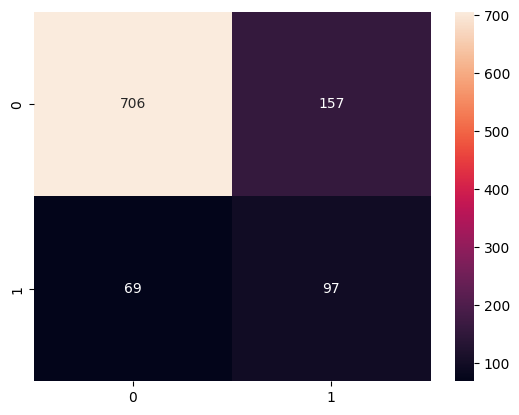



ROC_CURVE:


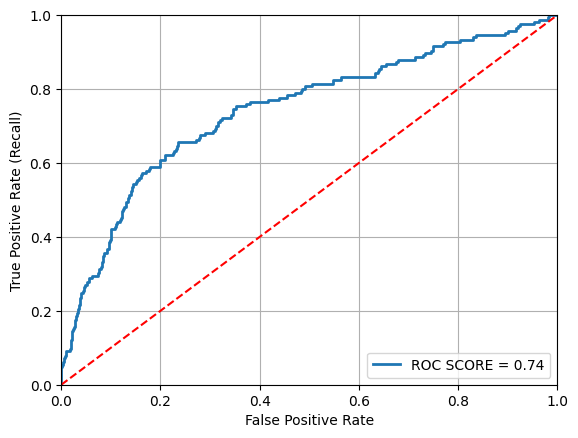

In [179]:
metrics_cross_val(y_train, X_train_transformed, pipeline_svm_poly)

####GridSearch

In [180]:
param_grid_svm_poly = {
    "svm_clf__C": [0.001, 0.01, 0.1, 1],
    "svm_clf__coef0": [5, 10, 12],
    "svm_clf__degree": [2, 3, 4]
}

Melhores parâmetros: {'svm_clf__C': 0.001, 'svm_clf__coef0': 10, 'svm_clf__degree': 4}
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       863
           1       0.38      0.67      0.49       166

    accuracy                           0.77      1029
   macro avg       0.65      0.73      0.67      1029
weighted avg       0.84      0.77      0.79      1029



Matriz de confusão:


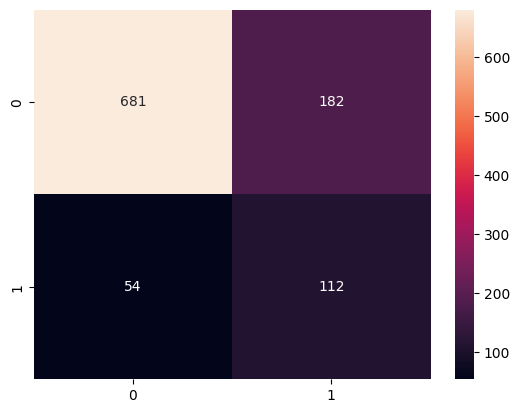



ROC_CURVE:


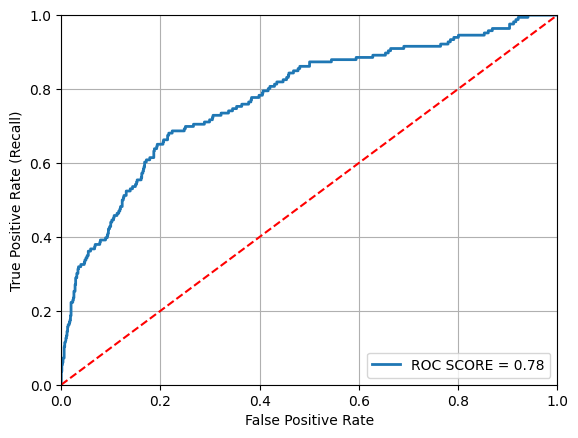

In [181]:
metrics_grid_search(y_train, X_train_transformed, pipeline_svm_poly, param_grid_svm_poly)

###Kernel RBF

In [182]:
from sklearn.svm import SVC

pipeline_svm_rbf = Pipeline([
    ('svm_clf', SVC(kernel='rbf', gamma=0.9, C=1, class_weight={1:5}, probability=True))
])

pipeline_svm_rbf.fit(X_train_transformed, y_train)

Pipeline(steps=[('svm_clf',
                 SVC(C=1, class_weight={1: 5}, gamma=0.9, probability=True))])

####Dados treinamento

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       863
           1       0.57      0.90      0.70       166

    accuracy                           0.87      1029
   macro avg       0.77      0.89      0.81      1029
weighted avg       0.91      0.87      0.88      1029



Matriz de confusão:


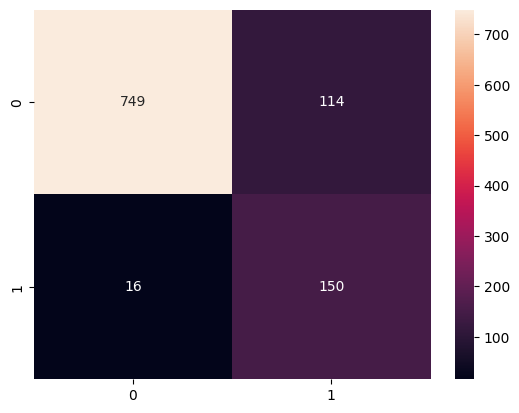



ROC_CURVE:


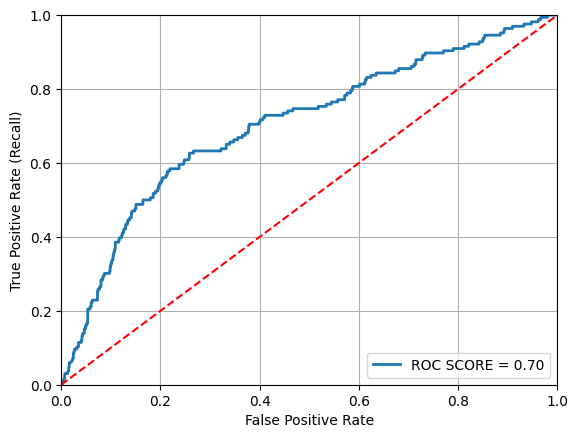

In [183]:
metrics(y_train, X_train_transformed, pipeline_svm_rbf)

####Validação cruzada

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       863
           1       0.36      0.50      0.42       166

    accuracy                           0.78      1029
   macro avg       0.63      0.67      0.64      1029
weighted avg       0.81      0.78      0.79      1029



Matriz de confusão:


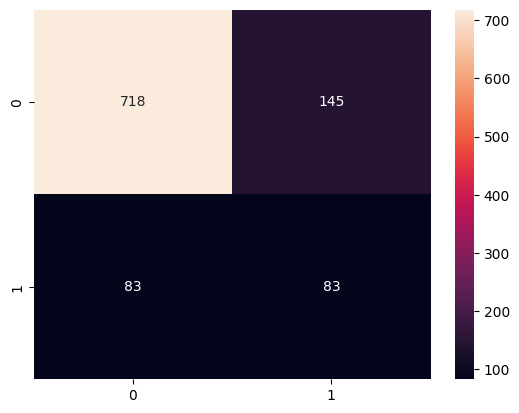



ROC_CURVE:


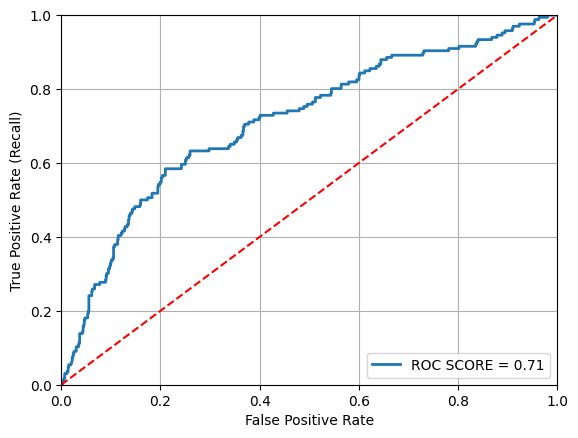

In [184]:
metrics_cross_val(y_train, X_train_transformed, pipeline_svm_rbf)

####GridSearch

In [185]:
param_grid_svm_rbf = {
    "svm_clf__C": [2, 4, 8],
    "svm_clf__gamma": [0.01, 0.1, 1]
}

Melhores parâmetros: {'svm_clf__C': 4, 'svm_clf__gamma': 0.1}
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       863
           1       0.38      0.67      0.48       166

    accuracy                           0.77      1029
   macro avg       0.65      0.73      0.67      1029
weighted avg       0.84      0.77      0.79      1029



Matriz de confusão:


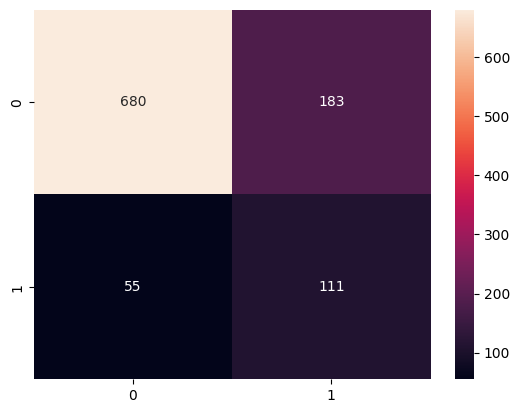



ROC_CURVE:


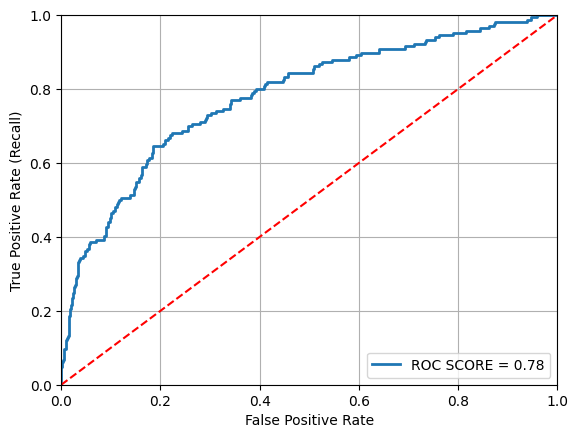

In [186]:
metrics_grid_search(y_train, X_train_transformed, pipeline_svm_rbf, param_grid_svm_rbf)

##CatBoosting

In [187]:
!pip install catboost

In [188]:
from catboost import CatBoostClassifier

In [189]:
cat_sampling = CatBoostClassifier(class_weights={0:0.17, 1:0.83})

In [190]:
param_cat = {
    'CatBoostClassifier__iterations': [100, 200, 300],
    'CatBoostClassifier__learning_rate': [0.1, 0.01 , 0.001],
    'CatBoostClassifier__depth': [2, 4, 6],
}

In [191]:
pipeline_cat = Pipeline([
    ('CatBoostClassifier', cat_sampling)
])

###GridSearch

Streaming output truncated to the last 5000 lines.
114:	learn: 0.4277628	total: 520ms	remaining: 384ms
115:	learn: 0.4267520	total: 522ms	remaining: 378ms
116:	learn: 0.4253714	total: 528ms	remaining: 374ms
117:	learn: 0.4239278	total: 539ms	remaining: 375ms
118:	learn: 0.4222443	total: 547ms	remaining: 372ms
119:	learn: 0.4213925	total: 554ms	remaining: 369ms
120:	learn: 0.4198422	total: 564ms	remaining: 368ms
121:	learn: 0.4188768	total: 571ms	remaining: 365ms
122:	learn: 0.4176740	total: 580ms	remaining: 363ms
123:	learn: 0.4167526	total: 593ms	remaining: 364ms
124:	learn: 0.4155197	total: 612ms	remaining: 367ms
125:	learn: 0.4143576	total: 614ms	remaining: 360ms
126:	learn: 0.4133177	total: 616ms	remaining: 354ms
127:	learn: 0.4126796	total: 617ms	remaining: 347ms
128:	learn: 0.4118822	total: 628ms	remaining: 345ms
129:	learn: 0.4105617	total: 632ms	remaining: 340ms
130:	learn: 0.4096507	total: 635ms	remaining: 335ms
131:	learn: 0.4085788	total: 653ms	remaining: 337ms
132:	learn: 0

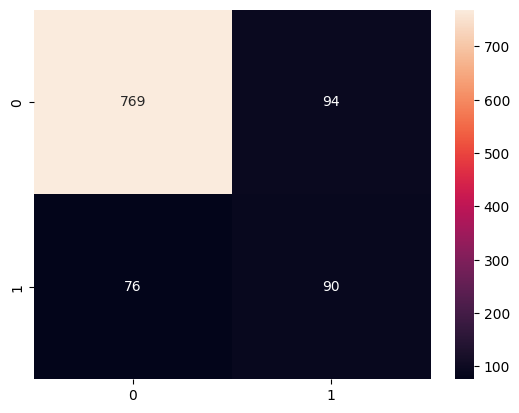



0:	learn: 0.6896276	total: 1.99ms	remaining: 596ms
1:	learn: 0.6853401	total: 4.12ms	remaining: 614ms
2:	learn: 0.6810393	total: 6.02ms	remaining: 596ms
3:	learn: 0.6764753	total: 7.16ms	remaining: 530ms
4:	learn: 0.6709261	total: 8.49ms	remaining: 501ms
5:	learn: 0.6673598	total: 11.3ms	remaining: 554ms
6:	learn: 0.6625171	total: 12.6ms	remaining: 529ms
7:	learn: 0.6581137	total: 13.9ms	remaining: 508ms
8:	learn: 0.6540358	total: 15.2ms	remaining: 490ms
9:	learn: 0.6504538	total: 16.7ms	remaining: 485ms
10:	learn: 0.6458827	total: 18ms	remaining: 472ms
11:	learn: 0.6418685	total: 19.6ms	remaining: 470ms
12:	learn: 0.6375237	total: 20.7ms	remaining: 457ms
13:	learn: 0.6349928	total: 22ms	remaining: 450ms
14:	learn: 0.6316333	total: 23.5ms	remaining: 446ms
15:	learn: 0.6279584	total: 24.5ms	remaining: 435ms
16:	learn: 0.6243809	total: 26ms	remaining: 433ms
17:	learn: 0.6210720	total: 27.2ms	remaining: 426ms
18:	learn: 0.6185355	total: 28.8ms	remaining: 426ms
19:	learn: 0.6160088	total

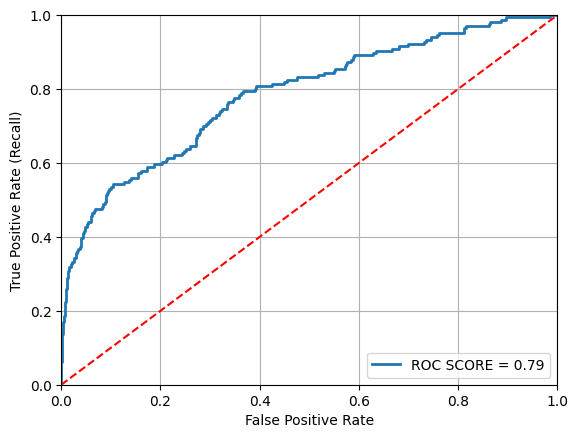

In [192]:
metrics_grid_search(y_train, X_train_transformed, pipeline_cat, param_cat)

##ExtraTreeClassifier

In [193]:
from sklearn.ensemble import ExtraTreesClassifier

In [194]:
extratree = ExtraTreesClassifier(class_weight={1:5})

In [195]:
param_grid_extra = {
    'ExtraTreesClassifier__criterion': ['gini', 'entropy', 'log_loss'],
    'ExtraTreesClassifier__n_estimators': [10, 20],
    'ExtraTreesClassifier__max_features': [0.70, 0.9],
    'ExtraTreesClassifier__max_depth': [10, 20]
}

In [196]:
pipeline_extra = Pipeline([
    ('ExtraTreesClassifier', extratree)
])

###GridSearch

Melhores parâmetros: {'ExtraTreesClassifier__criterion': 'entropy', 'ExtraTreesClassifier__max_depth': 10, 'ExtraTreesClassifier__max_features': 0.7, 'ExtraTreesClassifier__n_estimators': 20}
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       863
           1       0.51      0.40      0.45       166

    accuracy                           0.84      1029
   macro avg       0.70      0.66      0.68      1029
weighted avg       0.83      0.84      0.83      1029



Matriz de confusão:


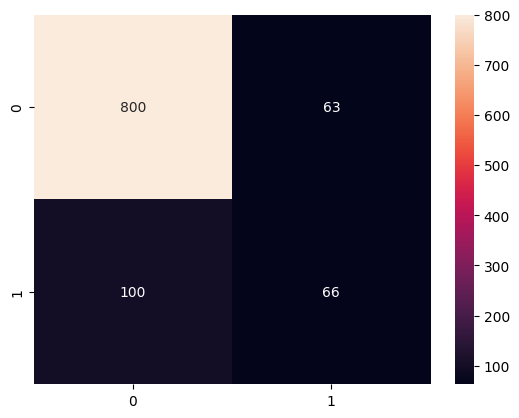



ROC_CURVE:


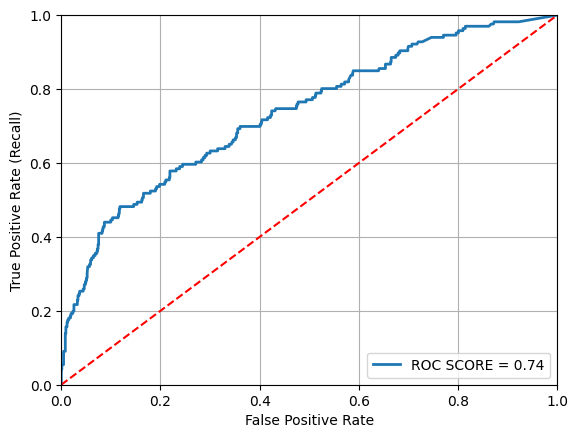

In [197]:
metrics_grid_search(y_train, X_train_transformed, pipeline_extra, param_grid_extra)

##RandomForest

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
random = RandomForestClassifier(class_weight={1:5})

In [200]:
param_grid_random = {
    'RandomForest__criterion': ['gini', 'entropy', 'log_loss'],
    'RandomForest__n_estimators': [10, 20],
    'RandomForest__max_features': [0.70, 0.9],
    'RandomForest__max_depth': [10, 20]
}

In [201]:
pipeline_random = Pipeline([
    ('RandomForest', random)
])

###GridSearch

Melhores parâmetros: {'RandomForest__criterion': 'entropy', 'RandomForest__max_depth': 20, 'RandomForest__max_features': 0.9, 'RandomForest__n_estimators': 10}
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       863
           1       0.64      0.21      0.32       166

    accuracy                           0.85      1029
   macro avg       0.75      0.59      0.62      1029
weighted avg       0.83      0.85      0.82      1029



Matriz de confusão:


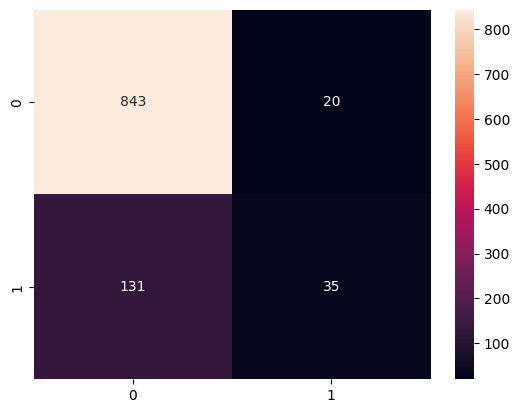



ROC_CURVE:


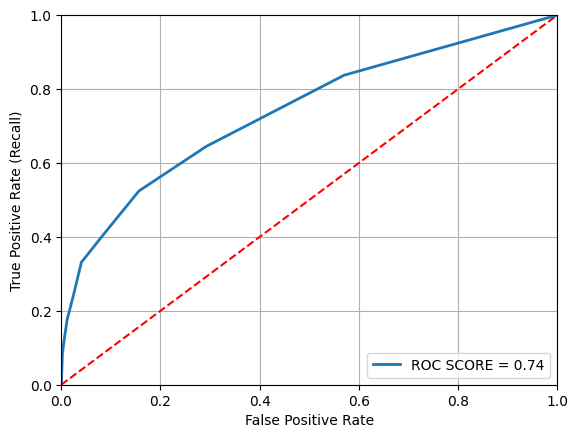

In [202]:
metrics_grid_search(y_train, X_train_transformed, pipeline_random, param_grid_random)

##Stacking

In [203]:
from sklearn.ensemble import StackingClassifier

In [212]:
modelos_base = {
    'SVM': SVC(C=4, gamma=0.1, kernel='rbf', probability=True),
    'ExtraTreeClassifier': ExtraTreesClassifier(criterion='log_loss', max_depth=10, max_features=0.7, n_estimators=10),
    'CatBoosting': CatBoostClassifier(depth=4, iterations=300, learning_rate=0.1)
}

In [213]:
estimators = list(modelos_base.items())

In [214]:
modelo_meta = LogisticRegression(solver='liblinear', class_weight={1:5}, C=0.1)

###GridSearch

Streaming output truncated to the last 5000 lines.
113:	learn: 0.1711575	total: 110ms	remaining: 180ms
114:	learn: 0.1696095	total: 111ms	remaining: 179ms
115:	learn: 0.1680060	total: 112ms	remaining: 178ms
116:	learn: 0.1660419	total: 113ms	remaining: 177ms
117:	learn: 0.1654500	total: 114ms	remaining: 176ms
118:	learn: 0.1644917	total: 115ms	remaining: 175ms
119:	learn: 0.1634299	total: 116ms	remaining: 174ms
120:	learn: 0.1626074	total: 117ms	remaining: 173ms
121:	learn: 0.1609579	total: 118ms	remaining: 173ms
122:	learn: 0.1599635	total: 119ms	remaining: 171ms
123:	learn: 0.1598119	total: 120ms	remaining: 170ms
124:	learn: 0.1581907	total: 121ms	remaining: 169ms
125:	learn: 0.1569056	total: 122ms	remaining: 168ms
126:	learn: 0.1558026	total: 123ms	remaining: 167ms
127:	learn: 0.1548039	total: 124ms	remaining: 166ms
128:	learn: 0.1539836	total: 125ms	remaining: 165ms
129:	learn: 0.1526970	total: 126ms	remaining: 164ms
130:	learn: 0.1517211	total: 126ms	remaining: 163ms
131:	learn: 0

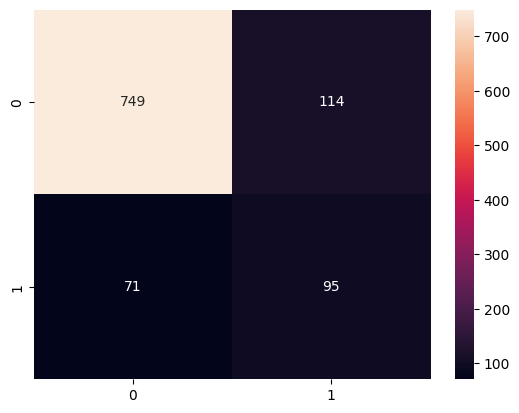

Streaming output truncated to the last 5000 lines.
101:	learn: 0.1854905	total: 173ms	remaining: 336ms
102:	learn: 0.1841154	total: 175ms	remaining: 335ms
103:	learn: 0.1831531	total: 177ms	remaining: 334ms
104:	learn: 0.1823068	total: 179ms	remaining: 332ms
105:	learn: 0.1808245	total: 180ms	remaining: 330ms
106:	learn: 0.1794839	total: 182ms	remaining: 328ms
107:	learn: 0.1786714	total: 184ms	remaining: 327ms
108:	learn: 0.1769310	total: 185ms	remaining: 325ms
109:	learn: 0.1759484	total: 187ms	remaining: 323ms
110:	learn: 0.1748299	total: 189ms	remaining: 322ms
111:	learn: 0.1733944	total: 191ms	remaining: 320ms
112:	learn: 0.1721658	total: 192ms	remaining: 318ms
113:	learn: 0.1711575	total: 194ms	remaining: 317ms
114:	learn: 0.1696095	total: 196ms	remaining: 315ms
115:	learn: 0.1680060	total: 198ms	remaining: 314ms
116:	learn: 0.1660419	total: 199ms	remaining: 312ms
117:	learn: 0.1654500	total: 201ms	remaining: 310ms
118:	learn: 0.1644917	total: 203ms	remaining: 309ms
119:	learn: 0

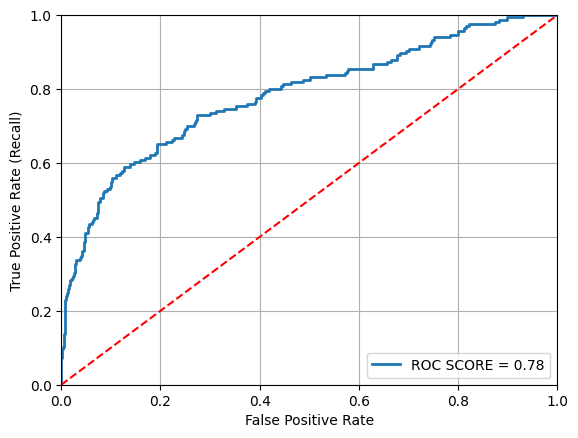

In [215]:
metrics_cross_val(y_train, X_train_transformed, StackingClassifier(estimators=estimators, final_estimator=modelo_meta))